# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Unsupervised Learning Project

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Notebook setup

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

from scipy import stats 
from scipy.spatial.distance import cdist
from scipy.stats import zscore, skew

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from mlxtend.classifier import StackingCVClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  
from sklearn.decomposition import PCA

In [2]:
# Notebook settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid")

## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> PRAT I
  

  
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* DOMAIN: Automobile 
* CONTEXT: The  data  concerns  city-cycle  fuel  consumption  in  miles  per  gallon,  to  be  predicted  in  terms  of  3  multivalued  discrete  and  5 continuous attributes 
* DATA DESCRIPTION: The data concerns city-cycle fuel consumption in miles per gallon •
* Attribute Information: 
    - 1.mpg: continuous
    - 2.cylinders: multi-valued discrete
    - 3.displacement: continuous
    - 4.horsepower: continuous
    - 5.weight: continuous
    - 6.acceleration: continuous
    - 7.model year: multi-valued discrete
    - 8.origin: multi-valued discrete
    - 9.car name: string (unique for each instance) 
* PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’ 
* Steps and tasks: [ Total Score: 25 points]
  - 1.Import and warehouse data: [ Score: 3 points ]
       - Import all the given datasets and explore shape and size.
       - Merge all datasets onto one and explore final shape and size.
       - Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
       - Import the data from above steps into python.
  - 2.Data cleansing: [ Score: 3 points ]
       - Missing/incorrect value treatment
       - Drop attribute/s if required using relevant functional knowledge
       - Perform another kind of corrections/treatment on the data.
  - 3.Data analysis & visualisation: [ Score: 4 points ]
       - Perform detailed statistical analysis on the data.
       - Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. Hint:  Use  your  best  analytical  approach.  Even  you  can  mix  match  columns  to  create  new  columns  which  can  be  used  for  better  analysis.  
       - Create your own features if required. Be highly experimental and analytical here to find hidden patterns.
  - 4.Machine learning: [ Score: 8 points ]
       - Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 
       - Share your insights about the difference in using these two methods. 
  - 5.Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]
       - Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
       - Use linear regression model on different clusters separately and print the coefficients of the models individually
       - How  using  different  models  for  different  clusters  will  be  helpful  in  this  case  and  how  it  will  be  different  than  using  one  single  model  without clustering? 
       - Mention how it impacts performance and prediction.
        
  - 6.Improvisation: [ Score: 2 points ]
       - Detailed  suggestions  or  improvements  or  on  quality,  quantity,  variety,  velocity,  veracity  etc.  on  the  data  points  collected  by  the  company    to perform a better data analysis in future.


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 1.Import and warehouse data

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Import all the given datasets and explore shape and size. 

In [3]:
# Import the dataset named 'Part1 - Car name.xls'
car_name  = pd.read_csv('./Part1 - Car name.xls') 
car_attr = pd.read_json('./Part1 - Car-Attributes.json')

print ("The shape and size of Car name.xls data are : {} and {} respectively".format(car_name.shape, car_name.size))
print ("The shape and size of Car-Attributes.json data are : {} and {} respectively".format(car_attr.shape, car_attr.size))

The shape and size of Car name.xls data are : (398, 1) and 398 respectively
The shape and size of Car-Attributes.json data are : (398, 8) and 3184 respectively


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Merge all datasets onto one and explore final shape and size.

In [4]:
# Merge all data into one and explore shape and size
car_data = car_name.join(car_attr)
print ("The shape and size of merged data are : {} and {} respectively".format(car_data.shape, car_data.size))

The shape and size of merged data are : (398, 9) and 3582 respectively


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [5]:
# Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use
car_data.to_csv('Car_data.csv')
car_data.to_excel('Car_data.xlsx')
car_data.to_json('Car_data.json')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Import the data from above steps into python.

In [6]:
# Import the data from above steps into python
car_data_csv = pd.read_csv('Car_data.csv')
car_data_xlsx = pd.read_excel('Car_data.xlsx')
car_data_csv = pd.read_json('Car_data.json')

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 2.Data cleansing

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Missing/incorrect value treatment

In [7]:
#View the first 10 rows of the data
#pd.set_option('display.max_columns', None)
car_data.head(10)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1
5           ford galaxie 500  15.0    8  429.0  198  4341  10.0  70       1
6           chevrolet impala  14.0    8  454.0  220  4354   9.0  70       1
7          plymouth fury iii  14.0    8  440.0  215  4312   8.5  70       1
8           pontiac catalina  14.0    8  455.0  225  4425  10.0  70       1
9         amc ambassador dpl  15.0    8  390.0  190  3850   8.5  70       1

#### Observation: 
<ol>
<li><span style="color:#228B22"> The data looks clean / garbage free in first 10 rows. However careful observation of data with excel shows non-standard missing values in hp column
<li><span style="color:#228B22"> Car name column is not significant for mpg prediction and can be dropped before modeling

In [8]:
#Check the specificaions of each columns
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### Observation:  
<ol>
<li><span style="color:#228B22"> The data has 397 rows and 9 columns with 2 object 3 float and 4 integer data type 
<li><span style="color:#228B22"> The hp column must have an integer data type, but marked as object because of unidentified values

In [9]:
# checking vlues which are not integers
hpIsDigit = pd.DataFrame(car_data['hp'].str.isdigit())  # if the string is made of digits store True else False

#print all non integer columns
car_data[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

In [10]:
# Replace missing values with NaN
car_data = car_data.replace('?', np.nan)
car_data[hpIsDigit['hp'] == False]

car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0 NaN  2046  19.0  71       1
126         ford maverick  21.0    6  200.0 NaN  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0 NaN  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0 NaN  2905  14.3  80       1
354           renault 18i  34.5    4  100.0 NaN  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0 NaN  3035  20.5  82       1

In [11]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.T # return the dataframe
missing_check(car_data)

hp  origin   yr  acc   wt  disp  cyl  mpg  car_name
Total    6.000000     0.0  0.0  0.0  0.0   0.0  0.0  0.0       0.0
Percent  0.015075     0.0  0.0  0.0  0.0   0.0  0.0  0.0       0.0

#### Observation:  
<ol>
<li><span style="color:#228B22"> There are 6 missing values in the hp column of the dataset

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Drop attribute/s if required using relevant functional knowledge

In [12]:
#dropping/ignoring car_name 
car_data = car_data.drop('car_name', axis=1)

In [13]:
# dropping missing vlaues will not be a good approach in this case 
# data1.dropna(inplace=True)

In [14]:
# replace the missing values with median value.
medianFiller = lambda x: x.fillna(x.median())
car_data = car_data.apply(medianFiller,axis=0)

car_data['hp'] = car_data['hp'].astype('float64')  # converting the hp column from object / string type to float

#### Observation:  
<ol>
    <li><span style="color:#228B22"> The non-standard missing values are replaced with median
    <li><span style="color:#228B22"> The distribution is slightly narrowed with the median imputation, but the effects are considered negligible. 
    

In [15]:
# checking for unique values in different columns
car_data.nunique()

mpg       129
cyl         5
disp       82
hp         94
wt        351
acc        95
yr         13
origin      3
dtype: int64

#### Observation:  
<ol>
<li><span style="color:#228B22"> All columns have repeating values, therefore presence of duplicate rows must be checked

In [16]:
# Identify duplicates records in the data
dupes = car_data.duplicated()
print ("The number of duplicate records in the data are {}".format(sum(dupes)))

# dropping any duplicates if present 
car_data = car_data.drop_duplicates()

The number of duplicate records in the data are 0


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Perform another kind of corrections/treatment on the data.

In [17]:
# Perform another kind of corrections/treatment on the data.
# Since ordinal sequence will create unrealistic pattern in origin column, we do one hot encoding for the origin column
car_data['origin'] = car_data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_data = pd.get_dummies(car_data, columns=['origin'])
car_data.head()

mpg  cyl   disp     hp    wt   acc  yr  origin_america  origin_asia  \
0  18.0    8  307.0  130.0  3504  12.0  70               1            0   
1  15.0    8  350.0  165.0  3693  11.5  70               1            0   
2  18.0    8  318.0  150.0  3436  11.0  70               1            0   
3  16.0    8  304.0  150.0  3433  12.0  70               1            0   
4  17.0    8  302.0  140.0  3449  10.5  70               1            0   

   origin_europe  
0              0  
1              0  
2              0  
3              0  
4              0

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 3.Data analysis & visualisation

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Perform detailed statistical analysis on the data

In [18]:
# Five number summary of the data along with median and IQR
pd.set_option('display.max_columns', None)
median = car_data.median().rename('median')
IQR = (car_data.quantile(q=0.75)-car_data.quantile(q=0.25)).rename('IQR')
pd.concat([car_data.describe().T, median, IQR], axis=1)

count         mean         std     min       25%     50%  \
mpg             398.0    23.514573    7.815984     9.0    17.500    23.0   
cyl             398.0     5.454774    1.701004     3.0     4.000     4.0   
disp            398.0   193.425879  104.269838    68.0   104.250   148.5   
hp              398.0   104.304020   38.222625    46.0    76.000    93.5   
wt              398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acc             398.0    15.568090    2.757689     8.0    13.825    15.5   
yr              398.0    76.010050    3.697627    70.0    73.000    76.0   
origin_america  398.0     0.625628    0.484569     0.0     0.000     1.0   
origin_asia     398.0     0.198492    0.399367     0.0     0.000     0.0   
origin_europe   398.0     0.175879    0.381197     0.0     0.000     0.0   

                     75%     max  median      IQR  
mpg               29.000    46.6    23.0    11.50  
cyl                8.000     8.0     4.0     4.00  
disp             262.000   455.0   148.5   157.75  
hp               125.000   230.0    93.5    49.00  
wt              3608.000  5140.0  2803.5  1384.25  
acc               17.175    24.8    15.5     3.35  
yr                79.000    82.0    76.0     6.00  
origin_america     1.000     1.0     1.0     1.00  
origin_asia        0.000     1.0     0.0     0.00  
origin_europe      0.000     1.0     0.0     0.00

#### Observation: 
<ol>
<li><span style="color:#228B22"> All values appears to be in resonable range
<li><span style="color:#228B22"> Few columns appear to be skewed

In [19]:
#  Checking the skewness and Kurtosis of data
pd.concat([car_data.skew().rename('skeweness'), car_data.kurtosis().rename('kurtosis')], axis=1)

skeweness  kurtosis
mpg              0.457066 -0.510781
cyl              0.526922 -1.376662
disp             0.719645 -0.746597
hp               1.106224  0.763583
wt               0.531063 -0.785529
acc              0.278777  0.419497
yr               0.011535 -1.181232
origin_america  -0.521133 -1.737175
origin_asia      1.517553  0.304473
origin_europe    1.709131  0.925756

#### Observation: 
<ol>
<li><span style="color:#228B22"> The columns displacement and horsepower are heavily left skewed.


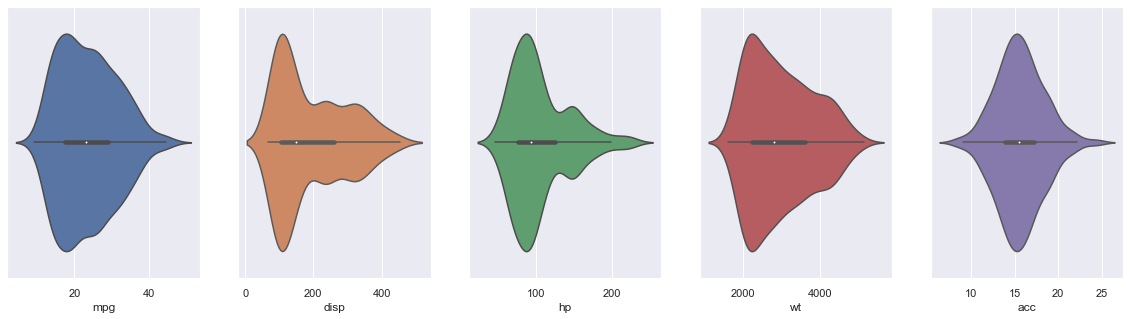

In [20]:
# Visualizing the skeweness more clearly with a vertical mirror image of distribution using the violin plot
fig, axs = plt.subplots(1,5, figsize=(20,5))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
numerical_vars = ['mpg', 'disp', 'hp', 'wt', 'acc']
numerical_vars = iter(numerical_vars)
for i in range(5):
    sns.violinplot(car_data[next(numerical_vars)], color=next(colors)["color"], ax=axs[i], kde=False);

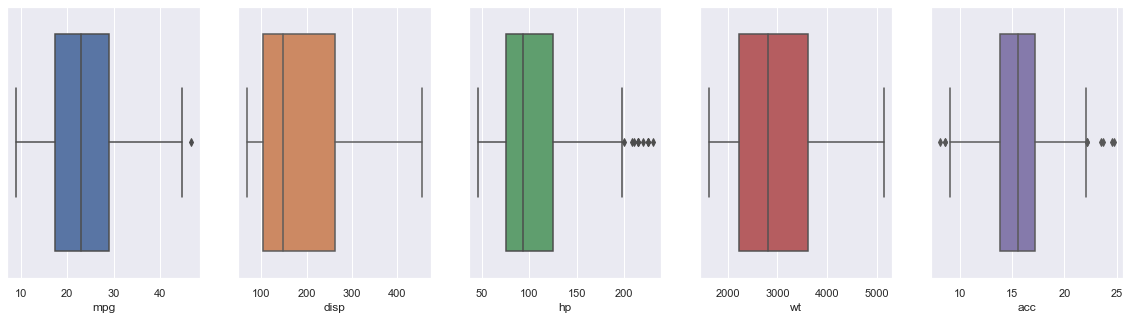

In [21]:
# Checking the presence of outliers
fig, axs = plt.subplots(1,5, figsize=(20,5))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
numerical_vars = ['mpg', 'disp', 'hp', 'wt', 'acc']
numerical_vars = iter(numerical_vars)
for i in range(5):
    sns.boxplot(car_data[next(numerical_vars)], color=next(colors)["color"], ax=axs[i]);

#### Observation: 
<ol>
<li><span style="color:#228B22"> The columns 'mpg' 'horsepower' and 'acceleration' are having ouliers based on the box plots.
<li><span style="color:#228B22"> We will create copy of data after filtering and replacing outliers for future experiments to tune the model


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

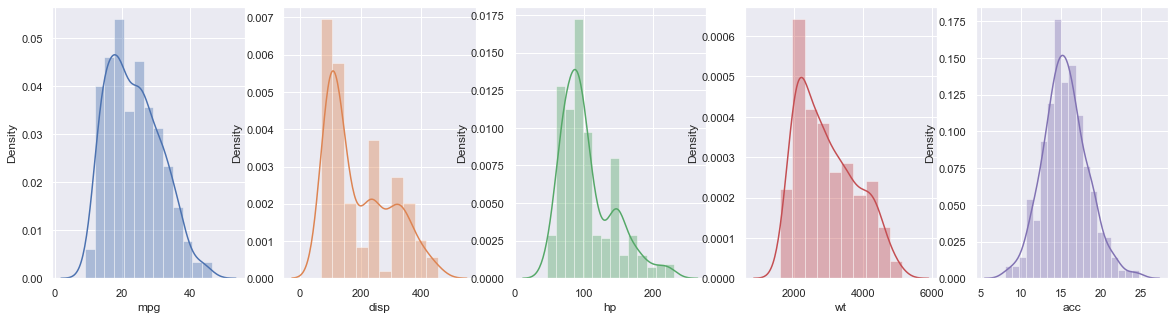

In [22]:
# Checking the univariate distribution of numerical columns
fig, axs = plt.subplots(1,5, figsize=(20,5))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
numerical_vars = ['mpg', 'disp', 'hp', 'wt', 'acc']
numerical_vars = iter(numerical_vars)
for i in range(5):
    sns.distplot(car_data[next(numerical_vars)], color=next(colors)["color"], ax=axs[i], kde=True);

#### Observation: 
<ol>
<li><span style="color:#228B22"> The displacement column is heavily skewed to left and has multiple modes
<li><span style="color:#228B22"> The displacement column is thus indicating possiblity for gaussian mixing in the dataset
<li><span style="color:#228B22"> The horsepower column is also left skewed and shows two modes


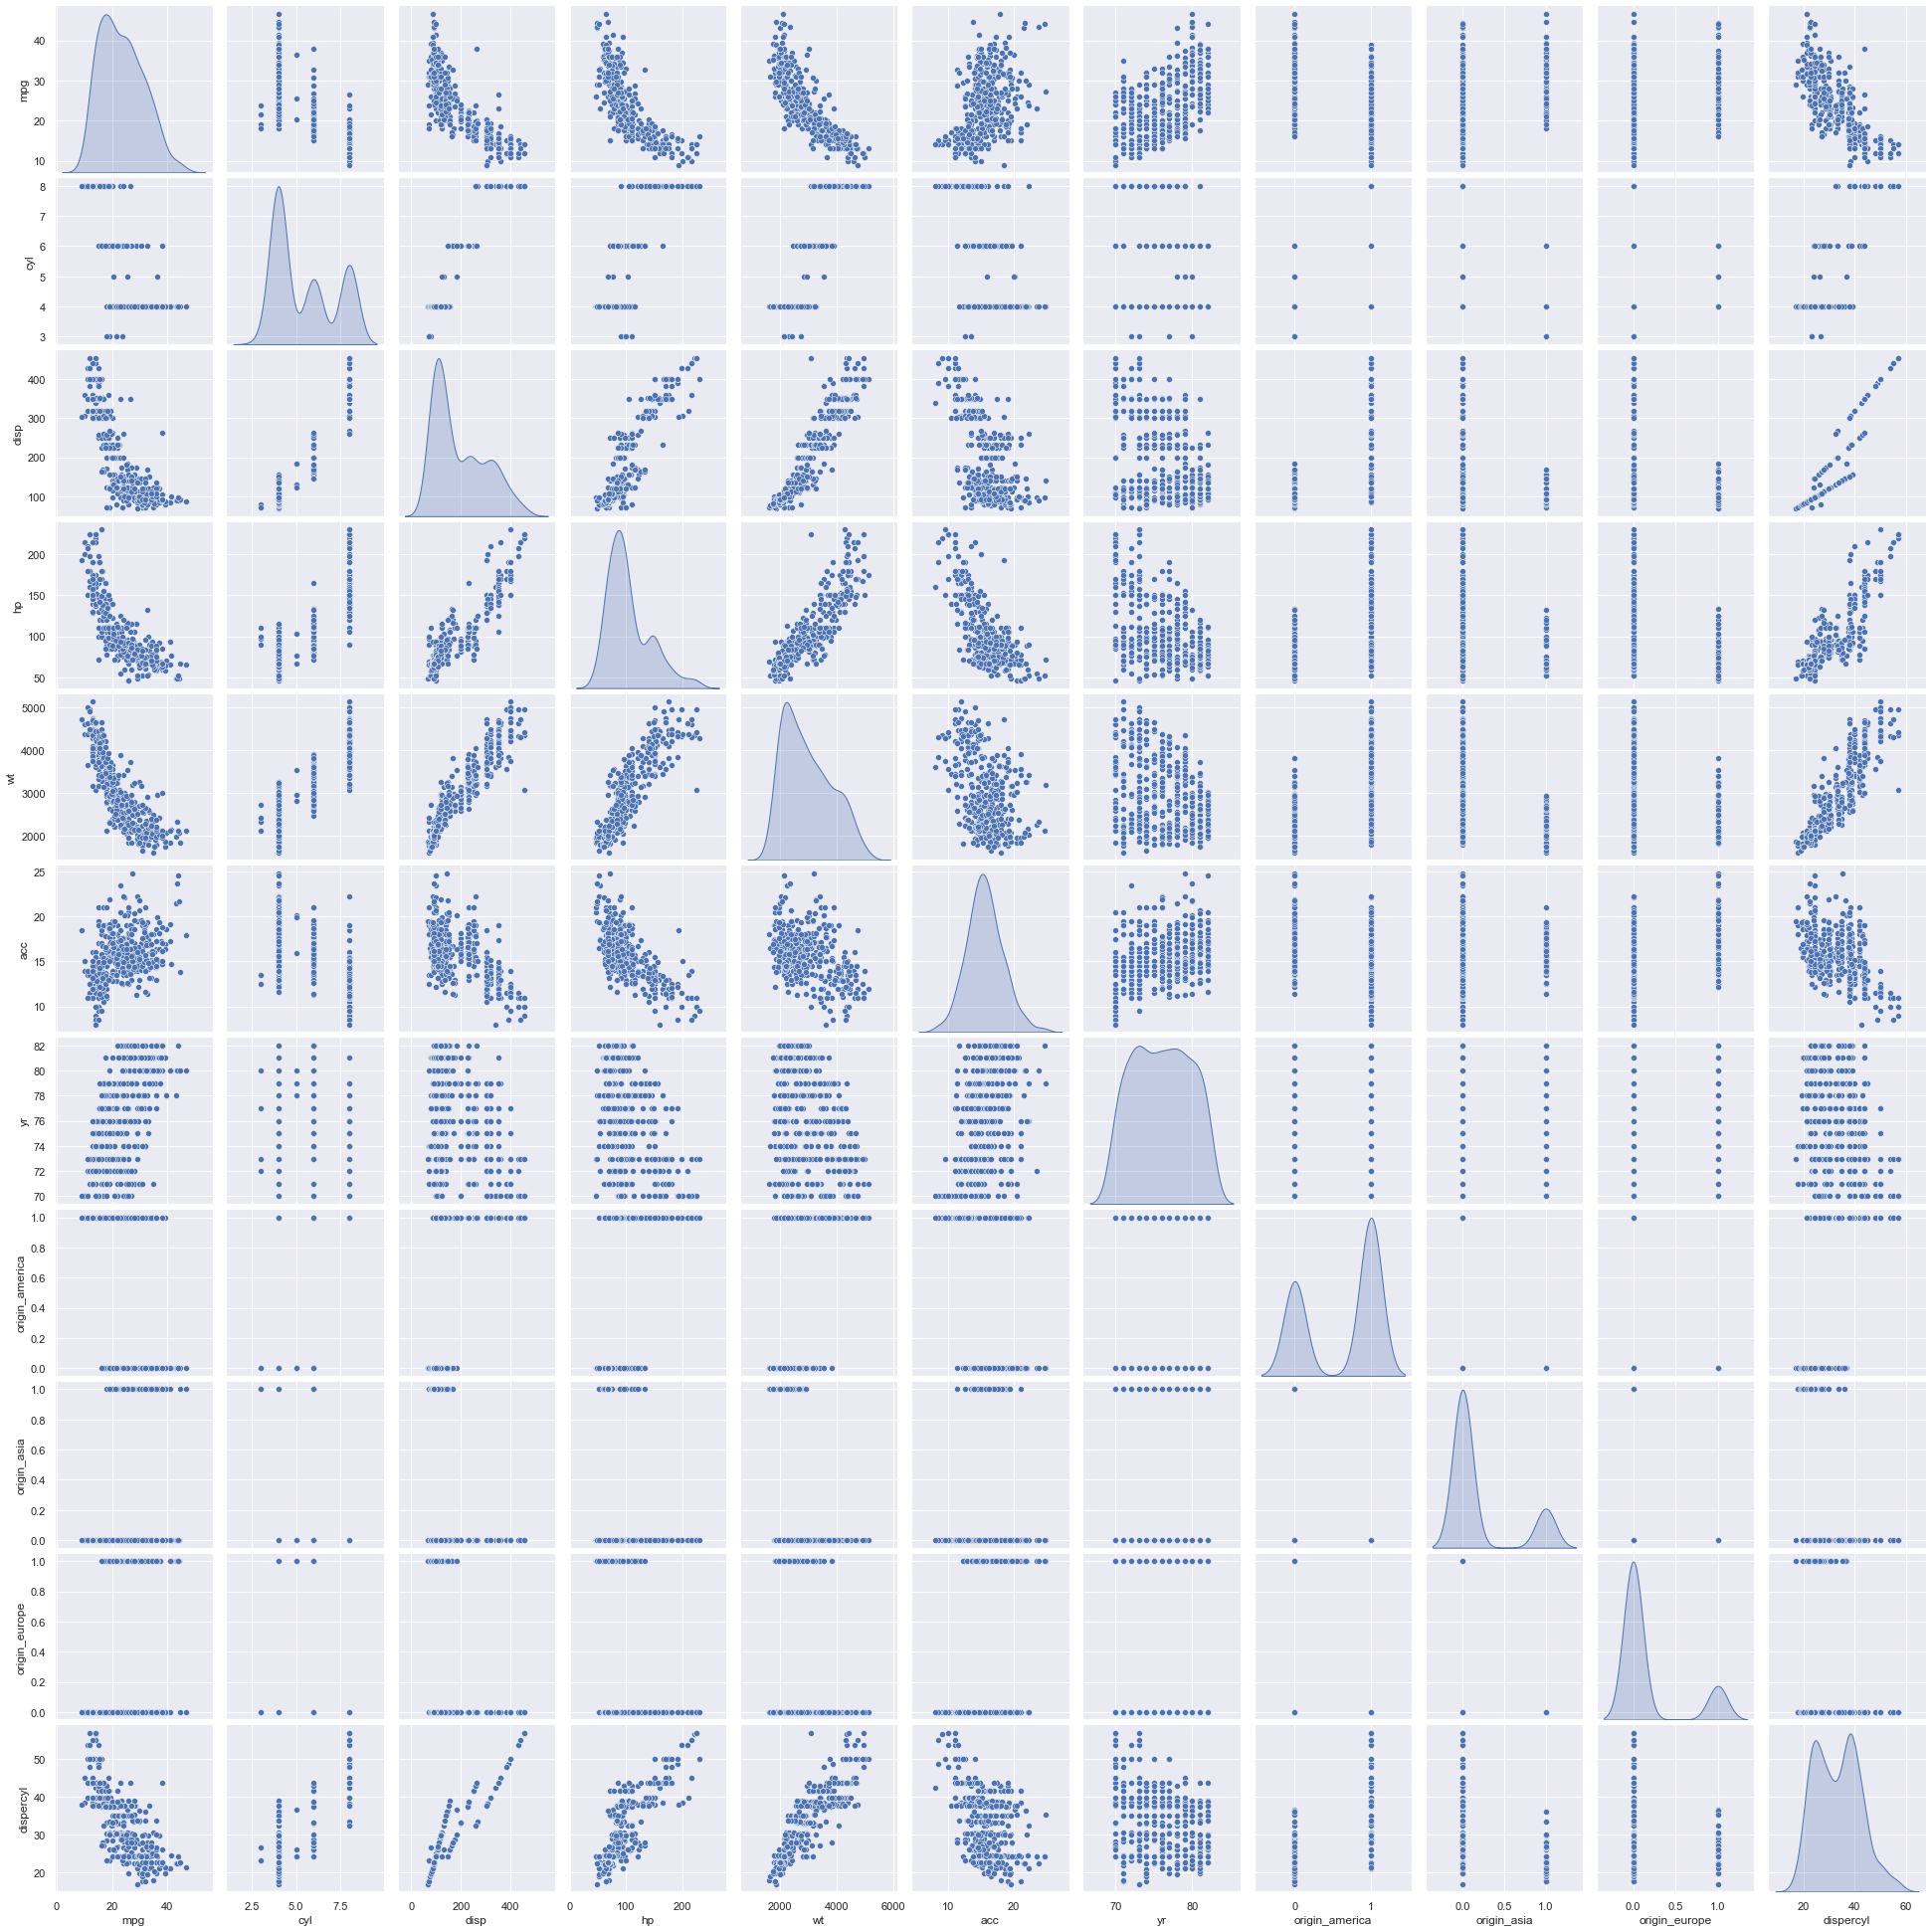

In [23]:
# A Scatter plot gives us an idea of the association between two variables
# We create a new feature, displacement per cylinder, which is more meaningfully related to mielage
car_data_engineered = car_data.copy()
car_data_engineered['dispercyl'] = car_data_engineered['disp'] / car_data_engineered['cyl']
sns.pairplot(car_data_engineered, diag_kind='kde');

#### Observation: 
<ol>
<li><span style="color:#228B22"> The kernal density estimates along the diagonals for most columns indicate that there are multiple gaussians mixed in the data
<li><span style="color:#228B22"> The mpg appears to have good correlation with all attributes except for acceleration, but the relationships are not linear
<li><span style="color:#228B22"> The displacement shows good correlation with horsepower, weight and cylinder. New features can be engineered out of the relationship. 
<li><span style="color:#228B22"> The distributions appears to have heteroscedasticity
<li><span style="color:#228B22"> Majority of the cars are american origin

In [24]:
# Check the correlation between each attribute
car_data_engineered.corr()

mpg       cyl      disp        hp        wt       acc  \
mpg             1.000000 -0.775396 -0.804203 -0.773453 -0.831741  0.420289   
cyl            -0.775396  1.000000  0.950721  0.841284  0.896017 -0.505419   
disp           -0.804203  0.950721  1.000000  0.895778  0.932824 -0.543684   
hp             -0.773453  0.841284  0.895778  1.000000  0.862442 -0.686590   
wt             -0.831741  0.896017  0.932824  0.862442  1.000000 -0.417457   
acc             0.420289 -0.505419 -0.543684 -0.686590 -0.417457  1.000000   
yr              0.579267 -0.348746 -0.370164 -0.413733 -0.306564  0.288137   
origin_america -0.568192  0.604351  0.651407  0.485418  0.598398 -0.250806   
origin_asia     0.442174 -0.396479 -0.433505 -0.318972 -0.440817  0.109144   
origin_europe   0.259022 -0.352861 -0.373886 -0.282877 -0.298843  0.204473   
dispercyl      -0.773363  0.775244  0.920171  0.810151  0.874531 -0.473430   

                      yr  origin_america  origin_asia  origin_europe  \
mpg             0.579267       -0.568192     0.442174       0.259022   
cyl            -0.348746        0.604351    -0.396479      -0.352861   
disp           -0.370164        0.651407    -0.433505      -0.373886   
hp             -0.413733        0.485418    -0.318972      -0.282877   
wt             -0.306564        0.598398    -0.440817      -0.298843   
acc             0.288137       -0.250806     0.109144       0.204473   
yr              1.000000       -0.139883     0.193101      -0.024489   
origin_america -0.139883        1.000000    -0.643317      -0.597198   
origin_asia     0.193101       -0.643317     1.000000      -0.229895   
origin_europe  -0.024489       -0.597198    -0.229895       1.000000   
dispercyl      -0.303936        0.695342    -0.480273      -0.380739   

                dispercyl  
mpg             -0.773363  
cyl              0.775244  
disp             0.920171  
hp               0.810151  
wt               0.874531  
acc             -0.473430  
yr              -0.303936  
origin_america   0.695342  
origin_asia     -0.480273  
origin_europe   -0.380739  
dispercyl        1.000000

#### Observation: 
<ol>
<li><span style="color:#228B22"> The columns 'cylinder', 'displacement', 'horsepower' and 'weight' are all strongly correlatted with each other.
<li><span style="color:#228B22"> Among that cylinder and displacement are most strongly correlated.

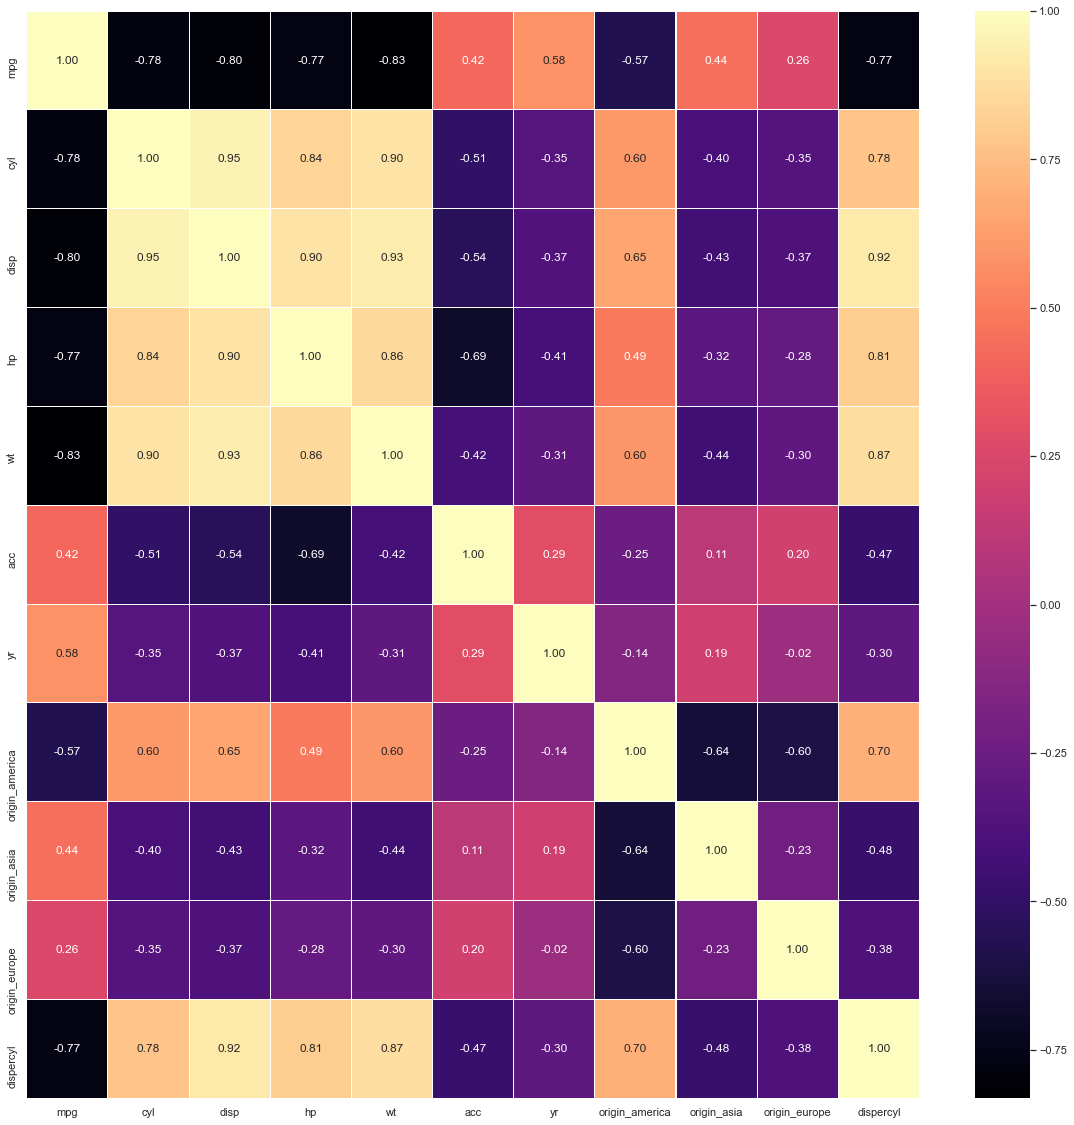

In [25]:
# Heat map for checking the correlation 
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(car_data_engineered.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 4. Machine learning

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data

In [26]:
#Scale the data 
car_data_scaled=car_data.copy()
car_data_scaled=car_data_scaled.apply(zscore)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

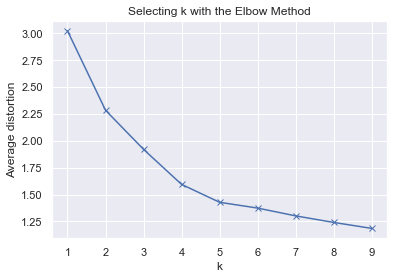

In [27]:
# Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_data_scaled)
    prediction=model.predict(car_data_scaled)
    meanDistortions.append(sum(np.min(cdist(car_data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### Observation: 
<ol>
<li><span style="color:#228B22"> Looks like 2, 3 or 4 can be optimal number of clusters

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      16.761714  7.177143  296.217143  134.168571  3746.771429  14.400571   
1      28.813901  4.103139  112.760090   80.867713  2361.183857  16.484305   

              yr  origin_america  origin_asia  origin_europe  
GROUP                                                         
0      74.542857        1.000000      0.00000       0.000000  
1      77.161435        0.331839      0.35426       0.313901

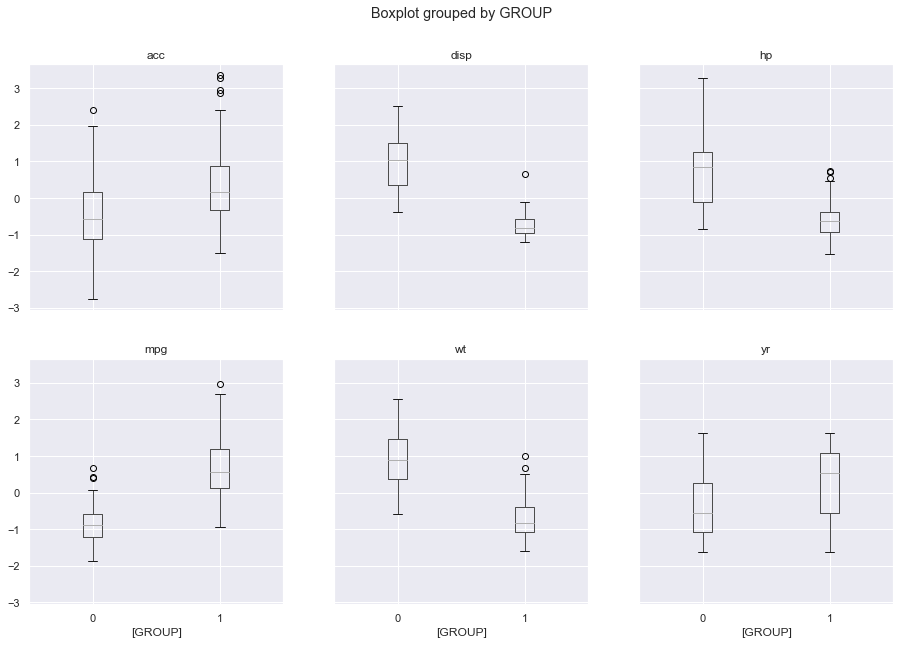

In [28]:
# Modeling for 2 clusters
def k_means_cluster(data, data_scaled, n):
    final_model=KMeans(n)
    final_model.fit(data_scaled)
    prediction=final_model.predict(data_scaled)

    #Append the prediction 
    data_clustered = data.copy()
    data_scaled_clustered = data_scaled.copy()
    data_clustered["GROUP"] = prediction
    data_scaled_clustered["GROUP"] = prediction

    data_clustered_grouped = data_clustered.groupby(['GROUP'])
    display(data_clustered_grouped.mean())
    data_scaled_clustered[['acc', 'disp', 'hp', 'mpg', 'wt', 'yr', 'GROUP']].boxplot(by='GROUP', layout = (2,3),figsize=(15,10));

car_data_2cluster_scaled = k_means_cluster(car_data, car_data_scaled, 2)

#### Observation: 
<ol>
<li><span style="color:#228B22"> The clusters are showing different range of distribution for displacement, horsepower, mileage, weight.
<li><span style="color:#228B22"> It is clear that there are two categories of cars with heavy weight and light weight.
<li><span style="color:#228B22"> Their cylinder displacements, mileage and horse power are also respectively different.
<li><span style="color:#228B22"> From the table we also notice that all the heavy weight cars are of american origin.

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      29.248322  4.127517  105.731544   80.348993  2316.161074  16.461074   
1      14.715000  7.980000  346.370000  160.550000  4126.910000  12.721000   
2      23.686577  5.087248  178.473154   90.510067  2848.523490  16.585906   

              yr  origin_america  origin_asia  origin_europe  
GROUP                                                         
0      76.677852             0.0     0.530201       0.469799  
1      73.750000             1.0     0.000000       0.000000  
2      76.859060             1.0     0.000000       0.000000

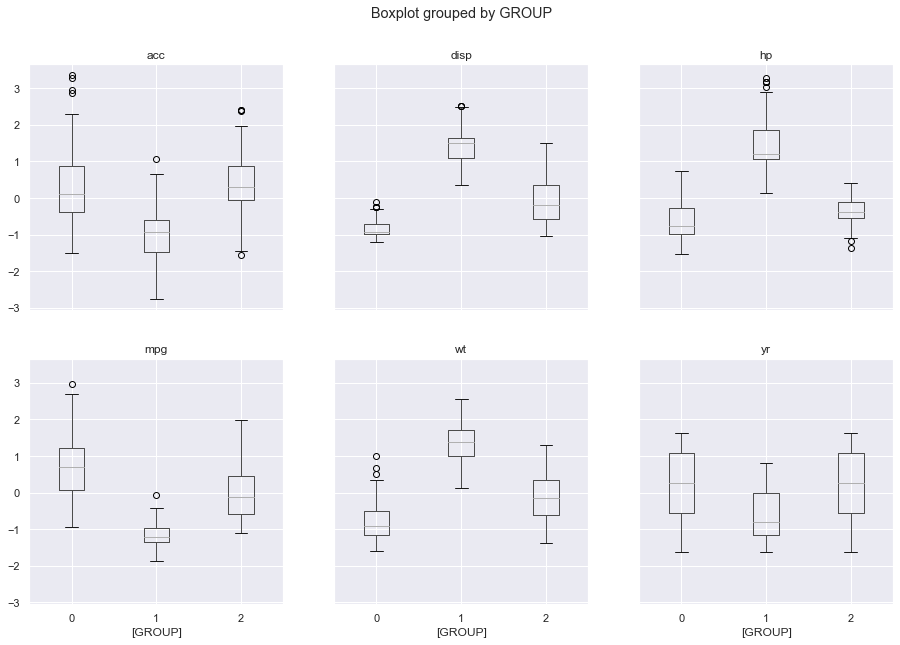

In [29]:
# Modeling for 3 clusters
car_data_3cluster_scaled = k_means_cluster(car_data, car_data_scaled, 3)

#### Observation: 
<ol>
<li><span style="color:#228B22"> The clusters formed are not as good as pervious case of 2 clusters. 
<li><span style="color:#228B22"> Here we notice that the europian origin cars are separated into a new cluster. But as far as mpg is concerned, it doesn't show much difference in average mpg

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      27.891429  4.157143  109.142857   80.928571  2423.300000  16.787143   
1      23.686577  5.087248  178.473154   90.510067  2848.523490  16.585906   
2      30.450633  4.101266  102.708861   79.835443  2221.227848  16.172152   
3      14.715000  7.980000  346.370000  160.550000  4126.910000  12.721000   

              yr  origin_america  origin_asia  origin_europe  
GROUP                                                         
0      75.814286               0            0              1  
1      76.859060               1            0              0  
2      77.443038               0            1              0  
3      73.750000               1            0              0

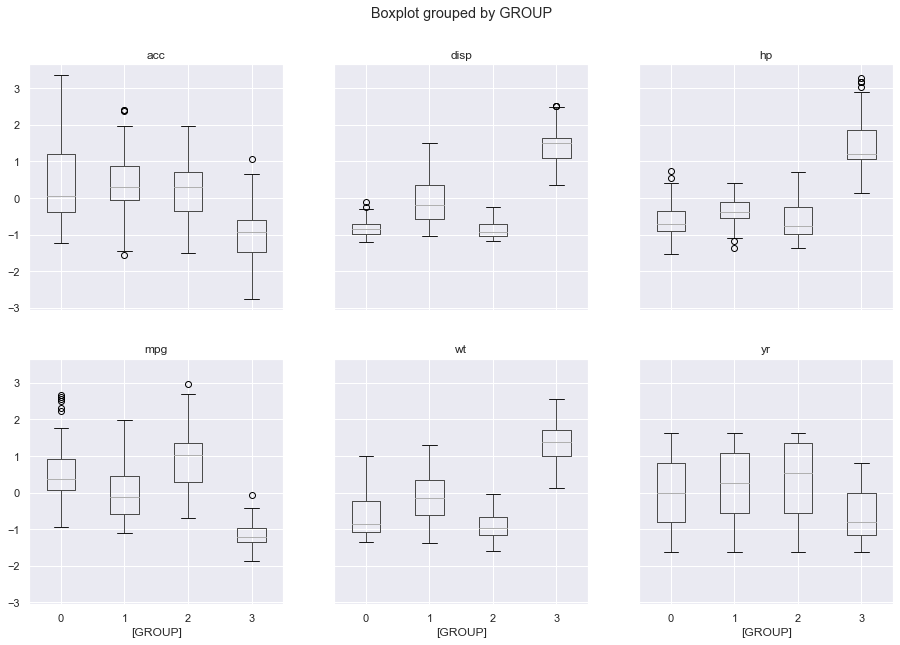

In [30]:
# Modeling for 4 clusters
car_data_4cluster_scaled = k_means_cluster(car_data, car_data_scaled, 4)

#### Observation: 
<ol>
<li><span style="color:#228B22"> Here we observe that all the 3 different origins are group in different clusters.  
<li><span style="color:#228B22"> Further american origin cars are subdivided into two clusters with heavy weight and light weight. 

### Hierarchical clustering

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       26.477852  4.607383  142.404362   85.479866  2584.137584  16.529866   
1       14.684000  7.980000  345.470000  160.400000  4121.560000  12.702000   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       76.771812             0.5     0.265101       0.234899  
1       73.740000             1.0     0.000000       0.000000

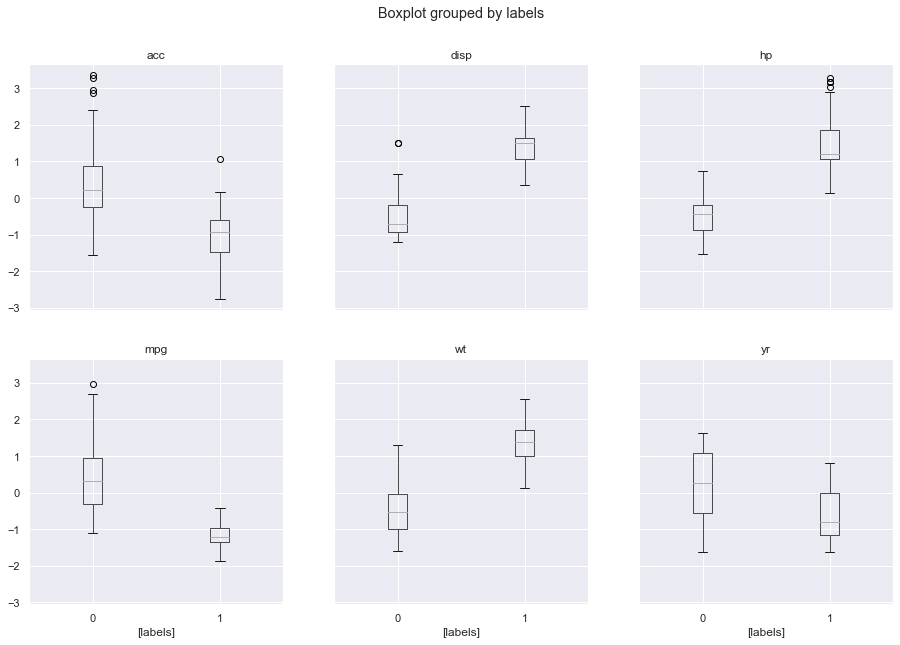

In [31]:
# Hierarchical clustering with 2 clusters
def hier_agglo_cluster(data, data_scaled, n):
    model = AgglomerativeClustering(n_clusters=n, affinity='euclidean',  linkage='average')
    model.fit(data_scaled)
    data_clustered = data.copy()
    data_scaled_clustered = data_scaled.copy()
    data_clustered['labels'] = model.labels_
    data_scaled_clustered['labels'] = model.labels_
    data_grouped = data_clustered.groupby(['labels'])
    display(data_grouped.mean())
    data_scaled_clustered[['acc', 'disp', 'hp', 'mpg', 'wt', 'yr', 'labels']].boxplot(by='labels', layout = (2,3),figsize=(15,10));
    return data_scaled_clustered
    
car_data_scaled_clustered = hier_agglo_cluster(car_data, car_data_scaled,2)

#### Observation: 
<ol>
<li><span style="color:#228B22"> Similar to K-Means clustering, the heavy weight cars of american origin are separated into one cluster. 
<li><span style="color:#228B22"> The clusters looks better than K-Means since the differece between mean values of clustered columns are larger.  

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       26.043860  4.745614  152.616228   86.877193  2633.517544  16.450877   
1       14.684000  7.980000  345.470000  160.400000  4121.560000  12.702000   
2       27.891429  4.157143  109.142857   80.928571  2423.300000  16.787143   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       77.065789        0.653509     0.346491            0.0  
1       73.740000        1.000000     0.000000            0.0  
2       75.814286        0.000000     0.000000            1.0

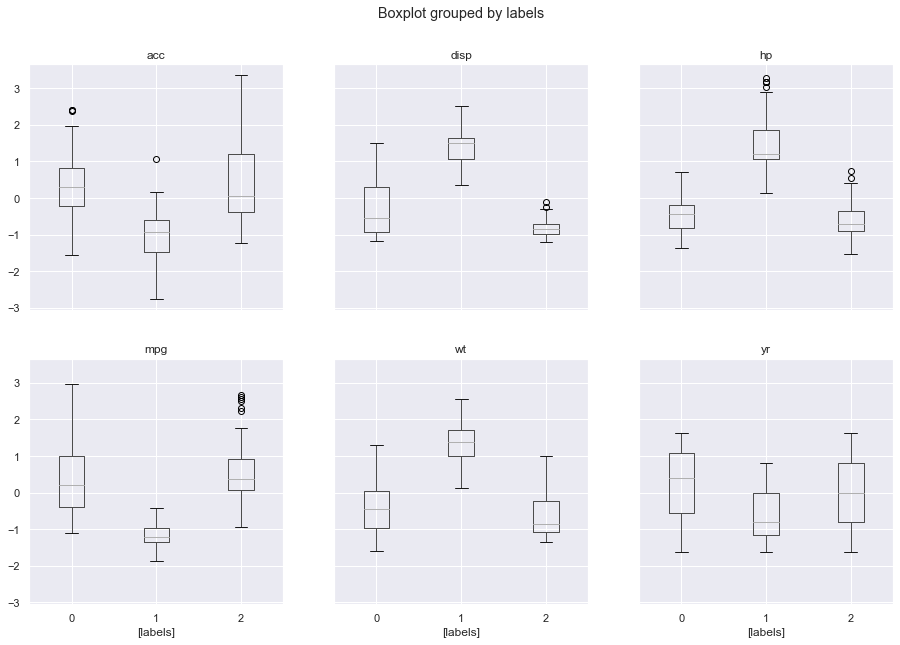

In [32]:
# Hierarchical clustering with 3 clusters
car_data_scaled_clustered = hier_agglo_cluster(car_data, car_data_scaled,3)

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       27.891429  4.157143  109.142857   80.928571  2423.300000  16.787143   
1       23.707383  5.087248  179.077181   90.610738  2852.114094  16.598658   
2       30.450633  4.101266  102.708861   79.835443  2221.227848  16.172152   
3       14.684000  7.980000  345.470000  160.400000  4121.560000  12.702000   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       75.814286               0            0              1  
1       76.865772               1            0              0  
2       77.443038               0            1              0  
3       73.740000               1            0              0

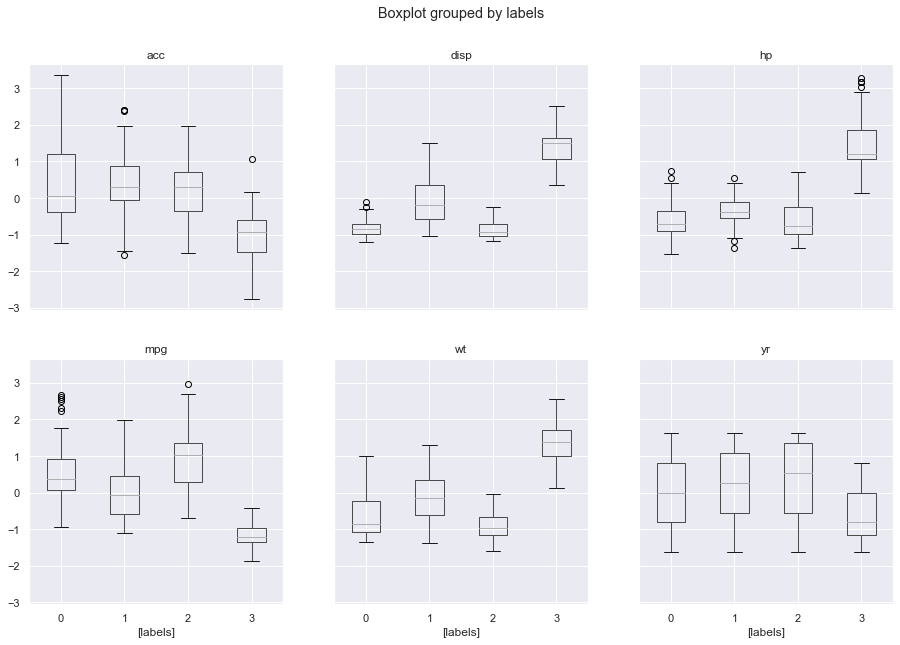

In [33]:
# Hierarchical clustering with 4 clusters
car_data_scaled_clustered = hier_agglo_cluster(car_data, car_data_scaled,4)

#### Observation: 
<ol>
<li><span style="color:#228B22"> The clusters formed are similar to K-Means approach but with more distinct values. 

In [34]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming',\
           'jaccard', 'mahalanobis', 'matching', 'minkowski', 'seuclidean', 'sqeuclidean']
methods=['single', 'complete', 'average', 'weighted']
mc=[];md=[];cc=[]
for x in metrics:
    for y in methods:
        Z = linkage(car_data_scaled, metric=x, method=y)
        c, coph_dists = cophenet(Z , pdist(car_data_scaled))
#         print ("The cophenetic correlation for distance metic {} and method {} is :{}".format(x, y, c))
        mc.append(x);md.append(y);cc.append(c)
Z = linkage(car_data_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(car_data_scaled))
# print ("The cophenetic correlation for distance metic {} and method {} is :{}".format('euclidean', 'ward', c))
mc.append('euclidean');md.append('ward');cc.append(c)
C = pd.DataFrame({'Metric':mc,
                  'Method':md,
                  'Cophenetic Correlation':cc
})
display(C)
print("The method and metic giving best combinations is:")
display((C[C['Cophenetic Correlation']==C['Cophenetic Correlation'].max()]))

Metric    Method  Cophenetic Correlation
0    braycurtis    single                0.694051
1    braycurtis  complete                0.683389
2    braycurtis   average                0.682925
3    braycurtis  weighted                0.715673
4      canberra    single                0.617376
5      canberra  complete                0.698149
6      canberra   average                0.699795
7      canberra  weighted                0.699522
8     chebyshev    single                0.662513
9     chebyshev  complete                0.425876
10    chebyshev   average                0.728909
11    chebyshev  weighted                0.726264
12    cityblock    single                0.635677
13    cityblock  complete                0.743635
14    cityblock   average                0.743995
15    cityblock  weighted                0.761300
16  correlation    single                0.656050
17  correlation  complete                0.647598
18  correlation   average                0.713666
19  correlation  weighted                0.705972
20       cosine    single                0.688195
21       cosine  complete                0.652419
22       cosine   average                0.714605
23       cosine  weighted                0.707589
24    euclidean    single                0.642677
25    euclidean  complete                0.720122
26    euclidean   average                0.769302
27    euclidean  weighted                0.721857
28      hamming    single                0.433747
29      hamming  complete                0.656497
30      hamming   average                0.686536
31      hamming  weighted                0.674648
32      jaccard    single                0.433747
33      jaccard  complete                0.656497
34      jaccard   average                0.686536
35      jaccard  weighted                0.674648
36  mahalanobis    single                0.594601
37  mahalanobis  complete                0.466157
38  mahalanobis   average                0.578927
39  mahalanobis  weighted                0.577173
40     matching    single                0.433747
41     matching  complete                0.656497
42     matching   average                0.686536
43     matching  weighted                0.674648
44    minkowski    single                0.642677
45    minkowski  complete                0.720122
46    minkowski   average                0.769302
47    minkowski  weighted                0.721857
48   seuclidean    single                0.642677
49   seuclidean  complete                0.720122
50   seuclidean   average                0.769302
51   seuclidean  weighted                0.721857
52  sqeuclidean    single                0.608031
53  sqeuclidean  complete                0.674946
54  sqeuclidean   average                0.751554
55  sqeuclidean  weighted                0.604667
56    euclidean      ward                0.747378

The method and metic giving best combinations is:


Metric   Method  Cophenetic Correlation
50  seuclidean  average                0.769302

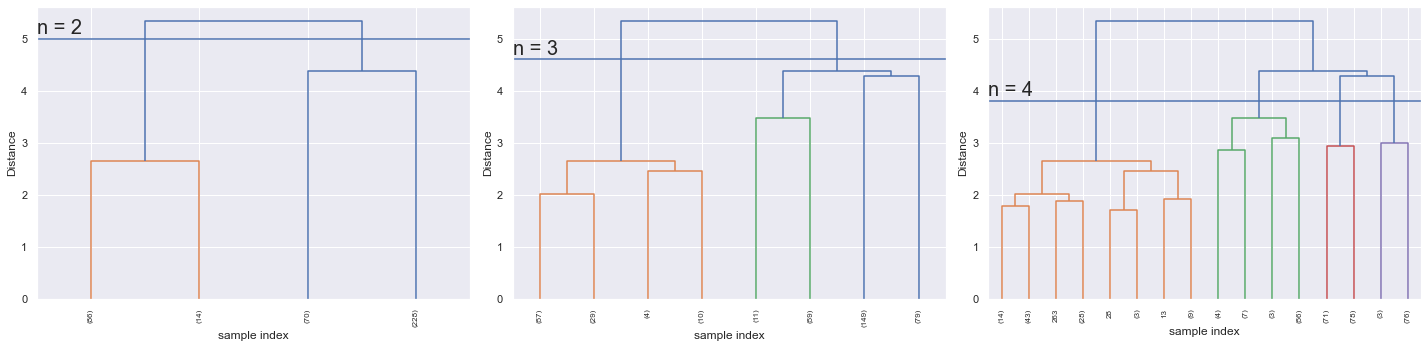

In [35]:
# Viualizing the clusters with a dendogram
fig, axs = plt.subplots(1,3, figsize=(20,5))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
Z = linkage(car_data_scaled, metric='euclidean', method='average')
for p in range(3):
    dendrogram(Z, leaf_rotation=90.,color_threshold = 4, leaf_font_size=8., truncate_mode='level', p=p+1, ax=axs[p])
    axs[p].set_xlabel('sample index')
    axs[p].set_ylabel('Distance')
axs[0].axhline(5)
axs[1].axhline(4.6)
axs[2].axhline(3.8)
axs[0].annotate('n = 2', xy=(0, 5.1),fontsize=20)
axs[1].annotate('n = 3', xy=(0, 4.7),fontsize=20)
axs[2].annotate('n = 4', xy=(0, 3.9),fontsize=20)
plt.tight_layout()

#### Some efforts to improve the clustering

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       26.352145  4.663366  144.714521   86.082508  2600.442244  16.503300   
1       14.464211  7.978947  348.789474  162.421053  4150.473684  12.585263   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       76.792079        0.508251     0.260726       0.231023  
1       73.515789        1.000000     0.000000       0.000000

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       26.116443  4.674497  145.437919   86.630872  2604.728188  16.389933   
1       14.464211  7.978947  348.789474  162.421053  4150.473684  12.585263   
2       40.400000  4.000000  101.600000   53.400000  2345.000000  23.260000   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       76.741611        0.516779     0.265101       0.218121  
1       73.515789        1.000000     0.000000       0.000000  
2       79.800000        0.000000     0.000000       1.000000

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       22.786667  6.000000  161.600000  112.866667  2953.200000  14.153333   
1       26.292933  4.604240  144.581272   85.240283  2586.257951  16.508481   
2       40.400000  4.000000  101.600000   53.400000  2345.000000  23.260000   
3       14.464211  7.978947  348.789474  162.421053  4150.473684  12.585263   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       77.866667        0.333333     0.400000       0.266667  
1       76.681979        0.526502     0.257951       0.215548  
2       79.800000        0.000000     0.000000       1.000000  
3       73.515789        1.000000     0.000000       0.000000

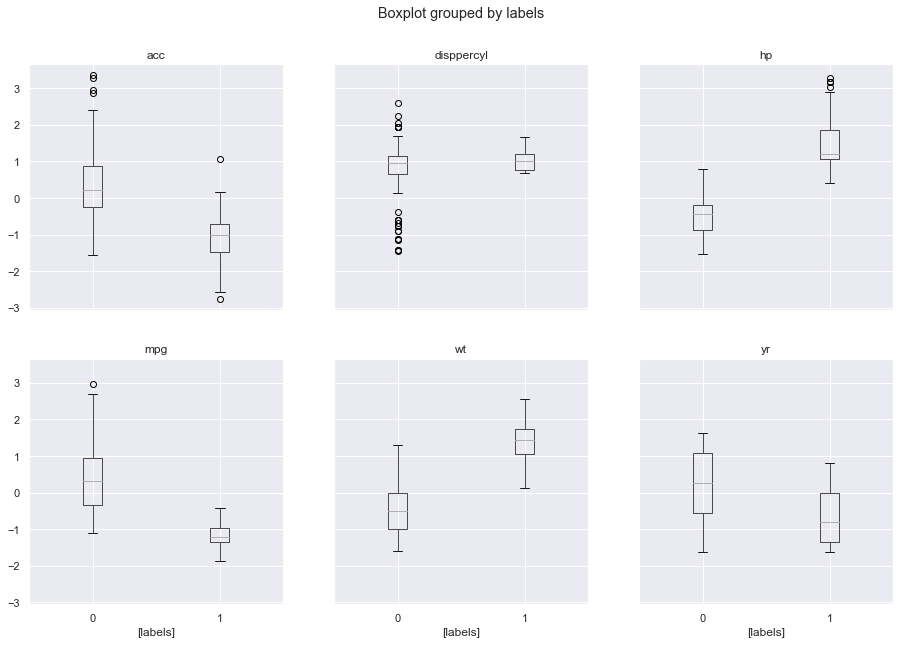

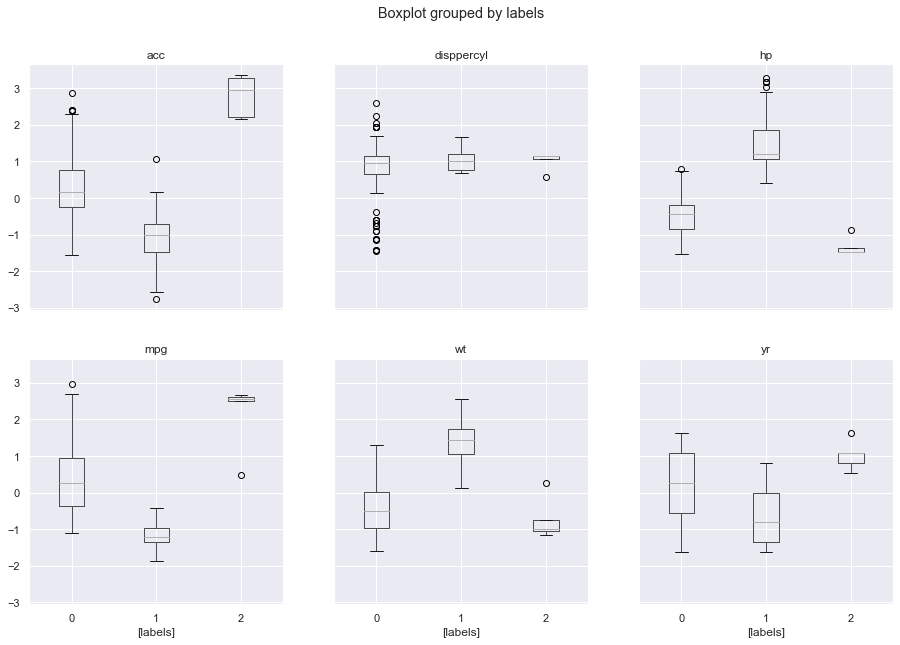

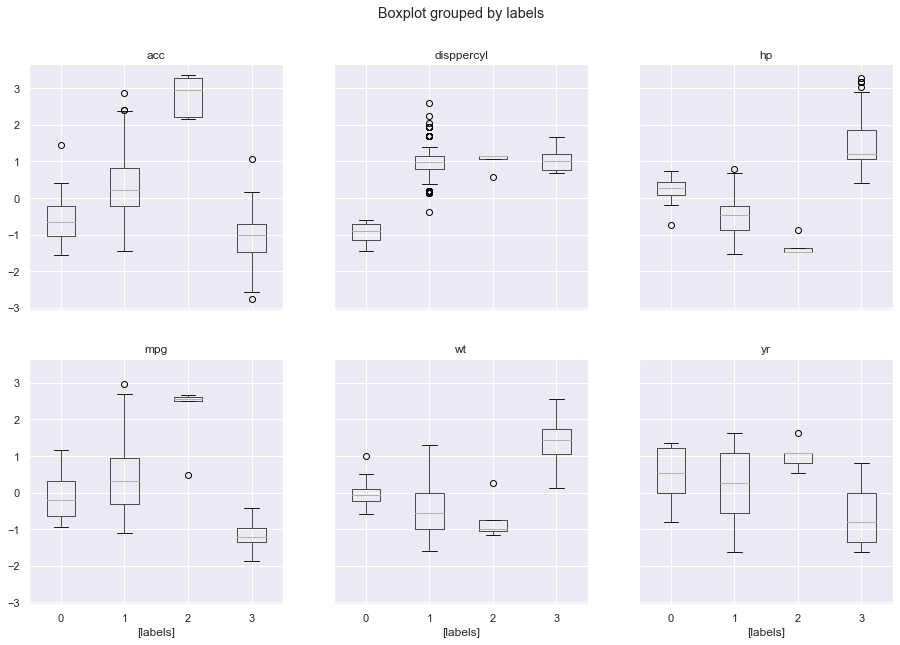

In [36]:
# The scaled data is modified to drop feature origin
# Replacing cyl and disp with disppercyl
def modify_data(data):
    modified_data = data.copy()
    modified_data.drop(['origin_america', 'origin_europe', 'origin_asia'], axis=1, inplace=True)
    modified_data['disppercyl'] = modified_data['disp'] / modified_data['cyl']
    modified_data.drop(['disp', 'cyl'], axis=1, inplace=True)
    return modified_data
    
def hier_agglo_cluster(data, data_scaled, n):
    model = AgglomerativeClustering(n_clusters=n, affinity='euclidean',  linkage='average')
    model.fit(data_scaled)
    data_clustered = data.copy()
    data_scaled_clustered = data_scaled.copy()
    data_clustered['labels'] = model.labels_
    data_scaled_clustered['labels'] = model.labels_
    data_grouped = data_clustered.groupby(['labels'])
    display(data_grouped.mean())
    data_scaled_clustered[['acc', 'disppercyl', 'hp', 'mpg', 'wt', 'yr', 'labels']].boxplot(by='labels', layout = (2,3),figsize=(15,10));
    return data_scaled_clustered

car_data_scaled_v1 = modify_data(car_data_scaled)
for i in range(2,5):
    car_data_scaled_clustered = hier_agglo_cluster(car_data, car_data_scaled_v1, i)

###  Defining outliers and replacing them for better distinction between clusters

In [37]:
#Discover outliers with statistical rule (with zscore)
def filter_zscore(data, cols):
    z = np.abs(stats.zscore(data[cols]))
    threshold = 3
    data_filtered = data.copy()
    for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):
        data_filtered.iloc[i,j] = data.iloc[:,j].median()
    return data_filtered

In [38]:
#Discover outliers with range IQR*1.5 
Q1 = car_data_scaled_v1.quantile(0.25)
Q3 = car_data_scaled_v1.quantile(0.75)
IQR = Q3 - Q1
np.where((car_data_scaled_v1 < (Q1 - 1.5 * IQR)) | (car_data_scaled_v1 > (Q3 + 1.5 * IQR)))

(array([  6,   7,   7,   8,   9,  11,  13,  25,  26,  27,  45,  59,  67,
         94,  95, 113, 116, 123, 134, 162, 174, 195, 202, 210, 211, 241,
        261, 274, 275, 277, 299, 300, 306, 307, 322, 326, 327, 333, 341,
        360, 361, 362, 386, 387, 394]),
 array([1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 5, 3, 1, 1, 1, 5, 1, 5, 5, 5, 5, 3,
        5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 0, 3, 5, 5, 5, 5, 5, 5, 5, 5,
        3]))

In [39]:
def filter_iqr(data):
    data_filtered = data.copy()

    # Replace every outlier on the lower side by the lower whisker
    for i, j in zip(np.where(data < Q1 - 1.5 * IQR)[0], np.where(data < Q1 - 1.5 * IQR)[1]): 
        whisker  = Q1 - 1.5 * IQR
        data_filtered.iloc[i,j] = whisker[j]

    # Replace every outlier on the upper side by the upper whisker    
    for i, j in zip(np.where(data > Q3 + 1.5 * IQR)[0], np.where(data > Q3 + 1.5 * IQR)[1]):
        whisker  = Q3 + 1.5 * IQR
        data_filtered.iloc[i,j] = whisker[j]
    return data_filtered

In [40]:
# Clusers after removing the outliers
def calc_hierarchical_cluster(data, data_scaled, i):
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='average')
    model.fit(data)
    data_clustered = data.copy()
    data_scaled_clustered = data_scaled.copy()
    data_clustered['labels'] = model.labels_
    data_scaled_clustered['labels'] = model.labels_
    data_grouped = data_clustered.groupby(['labels'])
    print ("Cluster means for {} clusters:".format(i))
    display(data_grouped.mean())
    return data_scaled_clustered
        
cols = ['acc', 'disppercyl', 'hp', 'mpg', 'wt', 'yr']
car_data_scaled_v1 = modify_data(car_data_scaled)

car_data_scaled_v1_filtered_iqr = filter_iqr(car_data_scaled_v1)
car_data_scaled_v1_filtered_zscore = filter_zscore(car_data_scaled_v1, cols)

for i in range(2, 5):
    car_data_clustered = calc_hierarchical_cluster(car_data, car_data_scaled_v1_filtered_iqr, i)
    car_data_clustered = calc_hierarchical_cluster(car_data, car_data_scaled_v1_filtered_zscore, i)

Cluster means for 2 clusters:


mpg       cyl        disp          hp           wt       acc  \
labels                                                                       
0       15.754545  7.492424  317.340909  145.113636  3999.992424  14.09697   
1       27.365414  4.443609  131.934211   84.052632  2459.511278  16.29812   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       74.515152        0.977273     0.000000       0.022727  
1       76.751880        0.451128     0.296992       0.251880

Cluster means for 2 clusters:


mpg       cyl        disp          hp           wt       acc  \
labels                                                                       
0       15.754545  7.492424  317.340909  145.113636  3999.992424  14.09697   
1       27.365414  4.443609  131.934211   84.052632  2459.511278  16.29812   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       74.515152        0.977273     0.000000       0.022727  
1       76.751880        0.451128     0.296992       0.251880

Cluster means for 3 clusters:


mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       27.365414  4.443609  131.934211   84.052632  2459.511278  16.298120   
1       13.889062  8.000000  358.093750  167.046875  4398.593750  13.025000   
2       17.510294  7.014706  278.985294  124.470588  3624.838235  15.105882   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       76.751880        0.451128     0.296992       0.251880  
1       73.375000        1.000000     0.000000       0.000000  
2       75.588235        0.955882     0.000000       0.044118

Cluster means for 3 clusters:


mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       27.365414  4.443609  131.934211   84.052632  2459.511278  16.298120   
1       13.889062  8.000000  358.093750  167.046875  4398.593750  13.025000   
2       17.510294  7.014706  278.985294  124.470588  3624.838235  15.105882   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       76.751880        0.451128     0.296992       0.251880  
1       73.375000        1.000000     0.000000       0.000000  
2       75.588235        0.955882     0.000000       0.044118

Cluster means for 4 clusters:


mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       13.889062  8.000000  358.093750  167.046875  4398.593750  13.025000   
1       30.738462  3.979021   98.486014   73.772727  2116.279720  16.583217   
2       17.510294  7.014706  278.985294  124.470588  3624.838235  15.105882   
3       23.443902  4.983740  170.821138   96.004065  2858.552846  15.966667   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       73.375000        1.000000     0.000000       0.000000  
1       76.594406        0.265734     0.426573       0.307692  
2       75.588235        0.955882     0.000000       0.044118  
3       76.934959        0.666667     0.146341       0.186992

Cluster means for 4 clusters:


mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       13.889062  8.000000  358.093750  167.046875  4398.593750  13.025000   
1       30.738462  3.979021   98.486014   73.772727  2116.279720  16.583217   
2       17.510294  7.014706  278.985294  124.470588  3624.838235  15.105882   
3       23.443902  4.983740  170.821138   96.004065  2858.552846  15.966667   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       73.375000        1.000000     0.000000       0.000000  
1       76.594406        0.265734     0.426573       0.307692  
2       75.588235        0.955882     0.000000       0.044118  
3       76.934959        0.666667     0.146341       0.186992

#### Observation: 
<ol>
<li><span style="color:#228B22"> Outlier removal with IQR looks more effective.
<li><span style="color:#228B22"> After removing outliers, the data is grouped into four discticnt groups clearly identified with distinct weight ranage and mpg range.
<li><span style="color:#228B22"> Now generating models for these four distinct groups separately will be a better approach.


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Share your insights about the difference in using these two methods

#### Insights: 
<ol>
<li><span style="color:#228B22"> Both methods gave similar clusters with same insight into the class of cars.
<li><span style="color:#228B22"> However hierarchical clustering appears to be more accurate comparatevly. 
<li><span style="color:#228B22"> Since the size of dataset is small, hierarchical clustering is a better choice

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 5. Answer below questions based on outcomes of using ML based methods

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

#### Ans: 
<ol>
<li><span style="color:#228B22"> There are four optimal clusters within  the dataset
<li><span style="color:#228B22"> The four clusters are because there are cars in four different weight range also exhibiting four different mpg range respectively. 
<li><span style="color:#228B22"> If we divide data into four clusters without dropping origin, the three origins groups become distinct, and the american origin cars are again classified into two, light weight and heavy weight. 
<li><span style="color:#228B22"> All the european and asian origin cars are light weight cars.

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Use linear regression model on different clusters separately and print the coefficients of the models individually

In [41]:
# First let's fit linear regression model on entire data

def linear_reg(data):
    data_lm = data.copy()
    X = data_lm.drop('mpg', axis=1)
    y = data_lm[['mpg']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    print ("Regression score on train data: {}".format(regression_model.score(X_train, y_train)))
    print ("Regression score on test data: {}".format(regression_model.score(X_test, y_test)))
    print ("The coefficients of the model are: {}".format(regression_model.coef_))

# lm_data = car_data_scaled_v1_filtered_iqr.copy()
lm_data = car_data_scaled.copy()
linear_reg(lm_data)

Regression score on train data: 0.8141025501610559
Regression score on test data: 0.8433135132808832
The coefficients of the model are: [[-0.08592264  0.38615018 -0.10637515 -0.79657374  0.02184681  0.39594105
  -0.09399897  0.04491789  0.0724306 ]]


In [42]:
#car_data_clustered = calc_hierarchical_cluster(car_data, car_data_scaled_v1_filtered_iqr, 2)
car_data_clustered = calc_hierarchical_cluster(car_data, car_data_scaled, 2)

Cluster means for 2 clusters:


mpg       cyl        disp          hp           wt       acc  \
labels                                                                       
0       15.754545  7.492424  317.340909  145.113636  3999.992424  14.09697   
1       27.365414  4.443609  131.934211   84.052632  2459.511278  16.29812   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       74.515152        0.977273     0.000000       0.022727  
1       76.751880        0.451128     0.296992       0.251880

In [43]:
# Now let's break the data into four groups
lightcar = lm_data[car_data_clustered['labels']==0]
heavycar = lm_data[car_data_clustered['labels']==1]

print("Light Weight Model:")
linear_reg(lightcar)
print("Heavy Weight Model:")
linear_reg(heavycar)

Light Weight Model:
Regression score on train data: 0.7132023249351396
Regression score on test data: 0.6114404980143544
The coefficients of the model are: [[-4.37555070e-02  3.67752770e-01 -1.46972932e-01 -3.82877817e-01
   6.45805062e-02  2.11437462e-01 -4.50456734e-02 -3.34536973e-30
   5.72611347e-02]]
Heavy Weight Model:
Regression score on train data: 0.7323277877158614
Regression score on test data: 0.7744139997810177
The coefficients of the model are: [[ 0.0951304   0.05992942 -0.41430424 -0.75948479  0.01579801  0.416894
  -0.07107196  0.02302251  0.06622531]]


In [44]:
car_data_clustered = calc_hierarchical_cluster(car_data, car_data_scaled_v1_filtered_iqr, 4)

Cluster means for 4 clusters:


mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       13.889062  8.000000  358.093750  167.046875  4398.593750  13.025000   
1       30.738462  3.979021   98.486014   73.772727  2116.279720  16.583217   
2       17.510294  7.014706  278.985294  124.470588  3624.838235  15.105882   
3       23.443902  4.983740  170.821138   96.004065  2858.552846  15.966667   

               yr  origin_america  origin_asia  origin_europe  
labels                                                         
0       73.375000        1.000000     0.000000       0.000000  
1       76.594406        0.265734     0.426573       0.307692  
2       75.588235        0.955882     0.000000       0.044118  
3       76.934959        0.666667     0.146341       0.186992

In [45]:
# Now let's break the data into four groups

verylightcar = lm_data[car_data_clustered['labels']==0]
lightcar = lm_data[car_data_clustered['labels']==1]
mediumcar = lm_data[car_data_clustered['labels']==2]
heavycar = lm_data[car_data_clustered['labels']==3]

print("Very Light Weight Model:")
linear_reg(verylightcar)
print("Light Weight Model:")
linear_reg(lightcar)
print("Medium Weight Model:")
linear_reg(mediumcar)
print("Heavy Weight Model:")
linear_reg(heavycar)

Very Light Weight Model:
Regression score on train data: 0.6727615645651266
Regression score on test data: 0.40996920018330263
The coefficients of the model are: [[ 0.65749207  0.01815465 -0.12305599 -0.16391379 -0.14252282  0.16081311
   0.          0.32874603  0.49311905]]
Light Weight Model:
Regression score on train data: 0.6840959883556138
Regression score on test data: 0.6776215376388257
The coefficients of the model are: [[ 2.18687429 -1.00459628 -0.07304579 -0.26464646  0.03399046  0.48043622
  -0.03903794  0.03503509  0.01291915]]
Medium Weight Model:
Regression score on train data: 0.5812135416479536
Regression score on test data: 0.2710688152147308
The coefficients of the model are: [[ 1.59406229e-01  1.45599694e-01 -1.99145488e-01 -4.04103274e-01
   3.21190667e-02  2.36139985e-01  1.06701341e-06 -2.82172656e-30
  -1.35636553e-06]]
Heavy Weight Model:
Regression score on train data: 0.6512025255148413
Regression score on test data: 0.5858049415848781
The coefficients of the 

In [46]:
#Ridge regression on the whole data
def ridge_reg(data):
    data_lm = data.copy()
    X = data_lm.drop('mpg', axis=1)
    y = data_lm[['mpg']]

    poly = PolynomialFeatures(degree = 2, interaction_only=True)
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30 , random_state=1)
    regression_model = Ridge(alpha=0.3)
    regression_model.fit(X_train, y_train)
    print ("Regression score on train data: {}".format(regression_model.score(X_train, y_train)))
    print ("Regression score on test data: {}".format(regression_model.score(X_test, y_test)))
    
def lasso_reg(data):
    data_lm = data.copy()
    X = data_lm.drop('mpg', axis=1)
    y = data_lm[['mpg']]
    
    poly = PolynomialFeatures(degree = 2, interaction_only=True)
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30 , random_state=1)
    regression_model = Lasso(alpha=0.1)
    regression_model.fit(X_train, y_train)
    print ("Regression score on train data: {}".format(regression_model.score(X_train, y_train)))
    print ("Regression score on test data: {}".format(regression_model.score(X_test, y_test)))

In [47]:
lm_data = car_data_scaled.copy()
ridge_reg(lm_data)

Regression score on train data: 0.9025975935207238
Regression score on test data: 0.867379292841846


In [48]:
lm_data = car_data_scaled.copy()
lasso_reg(lm_data)

Regression score on train data: 0.8170744454901813
Regression score on test data: 0.8489108462221279


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> How  using  different  models  for  different  clusters  will  be  helpful  in  this  case  and  how  it  will  be  different  than  using  one  single  model  without clustering? Mention how it impacts performance and prediction

#### Ans: 
<ol>
<li><span style="color:#228B22"> We observe that clustering the data and using different models for each cluster is not really improving the accuracy for Linear regression models. 

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 6. Improvisation

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Detailed  suggestions  or  improvements  or  on  quality,  quantity,  variety,  velocity,  veracity  etc.  on  the  data  points  collected  by  the  company    to perform a better data analysis in future.

#### Ans: 
<ol>
<li><span style="color:#228B22"> We observe that the data collected for different groups of cars can be made more evenly distributed. Equal number of data points can be obtained for light weight and heavy weight cars, this will improve the model. 
<li><span style="color:#228B22"> The present data had lack of quality as there were missing values. The missing values were imputed with median which narrowed the original distribution.
<li><span style="color:#228B22"> The data has heavy weight cars only from america, all the cars from europe and asia are light weight models. 

## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> PRAT II
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* DOMAIN: Manufacturing 
* CONTEXT: Company X curates and packages wine across various vineyards spread throughout the country.
* DATA DESCRIPTION: The data concerns the chemical composition of the wine and its respective quality.
* Attribute Information: 
 - 1.A, B, C, D: specific chemical composition measure of the wine
 - 2.Quality: quality of wine [ Low and High ]
* PROJECT OBJECTIVE: Goal is to build a synthetic data generation model using the existing data provided by the company.
* Steps and tasks: [ Total Score: 5 points]
 - 1.Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 1. Load the dataset

In [100]:
# Import the dataset named 'Part2 - Company.xlsx'
manufacturing_data  = pd.read_excel('./Part2 - Company.xlsx') 

In [101]:
manufacturing_data.head(10)

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A
5  153  140  154  199        NaN
6   34   28   78   22  Quality A
7  191  144  143  154        NaN
8  160  181  194  178  Quality B
9  145  178  158  141        NaN

In [103]:
manufacturing_data.shape

(61, 5)

In [105]:
available_data = manufacturing_data.dropna()
available_data.head(10)

A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
6    34   28   78   22  Quality A
8   160  181  194  178  Quality B
10   76   94  107   37  Quality A
11  138  200  153  192  Quality B
12   27  106   57   37  Quality A
13   45   76   56   57  Quality A

In [106]:
#Cluster the data into 2 clusters with k-means

available_data_scaled=available_data.drop(['Quality'],axis=1)
available_data_scaled=available_data_scaled.apply(zscore)


final_model=KMeans(2)
final_model.fit(available_data_scaled)
prediction=final_model.predict(available_data_scaled)

#Append the prediction 
clustered_data=available_data.copy()
clustered_data_scaled = available_data_scaled.copy()
clustered_data["GROUP"] = prediction
available_data_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
clustered_data.head()

Groups Assigned : 



A    B    C    D    Quality  GROUP
0   47   27   45  108  Quality A      0
1  174  133  134  166  Quality B      1
3   61   23    3   44  Quality A      0
4   59   60    9   68  Quality A      0
6   34   28   78   22  Quality A      0

In [55]:
data2_clust = clust_data2.groupby(['GROUP'])
data2_clust.count()

A   B   C   D  Quality
GROUP                         
0      33  33  33  33       17
1      28  28  28  28       26

In [107]:
data2_clust = clust_data2.groupby(['Quality'])
data2_clust.count()

A   B   C   D  GROUP
Quality                         
Quality A  26  26  26  26     26
Quality B  17  17  17  17     17

#### Ans: 
<ol>
<li><span style="color:#228B22"> The Quality 'A' is grouped into GROUP 1 and Quality 'B' into GROUP 0. 
<li><span style="color:#228B22"> Now any new data point classified by the model into GROUP 1 will be of Quality 'A'  and GROUP 0 will be Quality 'B"

## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> PRAT III
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* DOMAIN: Automobile 
* CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
* DATA  DESCRIPTION: The  data  contains  features  extracted  from  the  silhouette  of  vehicles  in  different  angles.  Four  "Corgie"  model  vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. All the features are numeric i.e. geometric features extracted from the silhouette.
* PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.
* Steps and tasks: [ Total Score: 20 points]
 - 1.Data: Import, clean and pre-process the data
 - 2.EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.  - -  
 - 3.Classifier: Design and train a best fit SVM classier using all the data attributes.
 - 4.Dimensional reduction: perform dimensional reduction on the data.
 - 5.Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.
 - 6.Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 1. Data: Import, clean and pre-process the data

In [57]:
# Import the dataset fron file 'Part3 - vehicle.xls'
automobile_data  = pd.read_csv('./Part3 - vehicle.xls') 

In [58]:
automobile_data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [59]:
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [60]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data # return the dataframe
missing_check(automobile_data)

Total   Percent
radius_ratio                     6  0.007092
skewness_about                   6  0.007092
circularity                      5  0.005910
scaled_radius_of_gyration.1      4  0.004728
distance_circularity             4  0.004728
scaled_variance                  3  0.003546
pr.axis_rectangularity           3  0.003546
scaled_radius_of_gyration        2  0.002364
scaled_variance.1                2  0.002364
pr.axis_aspect_ratio             2  0.002364
skewness_about.2                 1  0.001182
skewness_about.1                 1  0.001182
elongatedness                    1  0.001182
scatter_ratio                    1  0.001182
class                            0  0.000000
max.length_rectangularity        0  0.000000
max.length_aspect_ratio          0  0.000000
hollows_ratio                    0  0.000000
compactness                      0  0.000000

In [61]:
medianFiller = lambda x: x.fillna(x.median())
automobile_data.iloc[:,:18] = automobile_data.iloc[:, :18].apply(medianFiller,axis=0)
missing_check(automobile_data)

Total  Percent
class                            0      0.0
pr.axis_rectangularity           0      0.0
circularity                      0      0.0
distance_circularity             0      0.0
radius_ratio                     0      0.0
pr.axis_aspect_ratio             0      0.0
max.length_aspect_ratio          0      0.0
scatter_ratio                    0      0.0
elongatedness                    0      0.0
max.length_rectangularity        0      0.0
hollows_ratio                    0      0.0
scaled_variance                  0      0.0
scaled_variance.1                0      0.0
scaled_radius_of_gyration        0      0.0
scaled_radius_of_gyration.1      0      0.0
skewness_about                   0      0.0
skewness_about.1                 0      0.0
skewness_about.2                 0      0.0
compactness                      0      0.0

In [62]:
automobile_data.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              423
scaled_radius_of_gyration      144
scaled_radius_of_gyration.1     40
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [63]:
automobile_data['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [64]:
dupes = automobile_data.duplicated()
print ("The number of duplicate records in the data are {}".format(sum(dupes)))

The number of duplicate records in the data are 0


In [65]:
# automobile_data['class'] = automobile_data['class'].replace({'van': 1, 'car': 2, 'bus': 3})
# automobile_data['class'] = automobile_data['class'].astype('float64')

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.

In [66]:
pd.set_option('display.max_columns', None)
median = automobile_data.median().rename('median')
IQR = (automobile_data.quantile(q=0.75)-automobile_data.quantile(q=0.25)).rename('IQR')
pd.concat([automobile_data.describe().T, median, IQR], axis=1)

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  median     IQR  
compactness                   93.0  100.00   119.0    93.0   13.00  
circularity                   44.0   49.00    59.0    44.0    9.00  
distance_circularity          80.0   98.00   112.0    80.0   28.00  
radius_ratio                 167.0  195.00   333.0   167.0   54.00  
pr.axis_aspect_ratio          61.0   65.00   138.0    61.0    8.00  
max.length_aspect_ratio        8.0   10.00    55.0     8.0    3.00  
scatter_ratio                157.0  198.00   265.0   157.0   51.00  
elongatedness                 43.0   46.00    61.0    43.0   13.00  
pr.axis_rectangularity        20.0   23.00    29.0    20.0    4.00  
max.length_rectangularity    146.0  159.00   188.0   146.0   22.00  
scaled_variance              179.0  217.00   320.0   179.0   50.00  
scaled_variance.1            363.5  586.75  1018.0   363.5  268.50  
scaled_radius_of_gyration    173.5  198.00   268.0   173.5   49.00  
scaled_radius_of_gyration.1   71.5   75.00   135.0    71.5    8.00  
skewness_about                 6.0    9.00    22.0     6.0    7.00  
skewness_about.1              11.0   19.00    41.0    11.0   14.00  
skewness_about.2             188.0  193.00   206.0   188.0    9.00  
hollows_ratio                197.0  201.00   211.0   197.0   10.75

In [67]:
pd.concat([automobile_data.skew().rename('skeweness'), automobile_data.kurtosis().rename('kurtosis')], axis=1)

skeweness   kurtosis
compactness                   0.381271  -0.535275
circularity                   0.264928  -0.910125
distance_circularity          0.108718  -0.967704
radius_ratio                  0.397572   0.329029
pr.axis_aspect_ratio          3.835392  29.968642
max.length_aspect_ratio       6.778394  58.375455
scatter_ratio                 0.608710  -0.613414
elongatedness                 0.046951  -0.864475
pr.axis_rectangularity        0.774406  -0.379654
max.length_rectangularity     0.256359  -0.770098
scaled_variance               0.655598   0.131983
scaled_variance.1             0.845345  -0.196110
scaled_radius_of_gyration     0.279910  -0.490306
scaled_radius_of_gyration.1   2.089979  11.526959
skewness_about                0.780813   0.117607
skewness_about.1              0.689014  -0.140974
skewness_about.2              0.249985  -0.585847
hollows_ratio                -0.226341  -0.813435

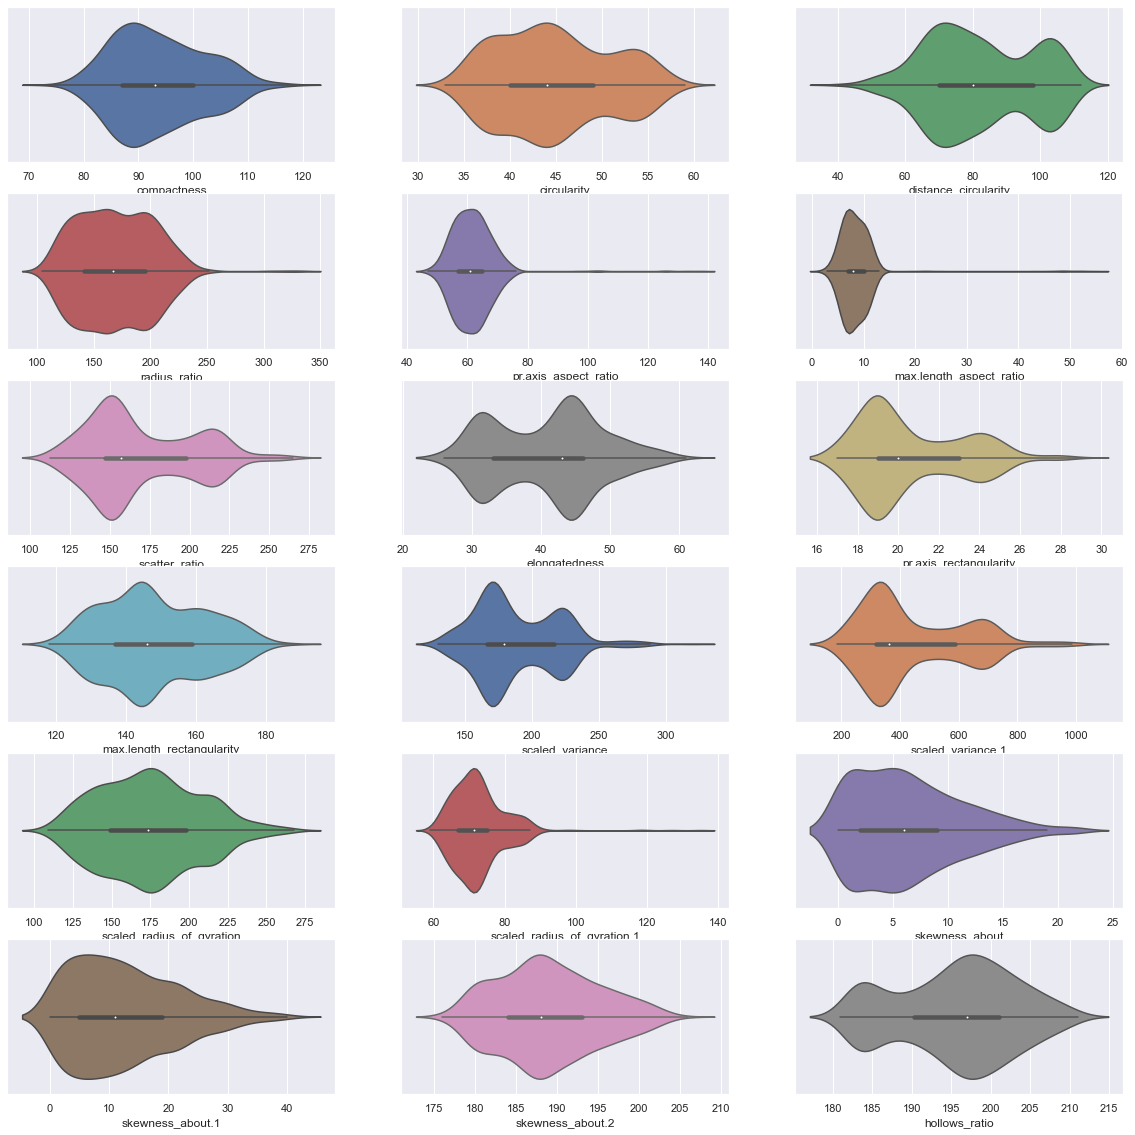

In [68]:
# Visualizing the skeweness more clearly with a vertical mirror image of distribution using the violin plot
fig, axs = plt.subplots(6,3, figsize=(20,20))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
for i in range(18):
    sns.violinplot(automobile_data[automobile_data.columns[i]], color=next(colors)["color"], ax=axs[i], kde=False);

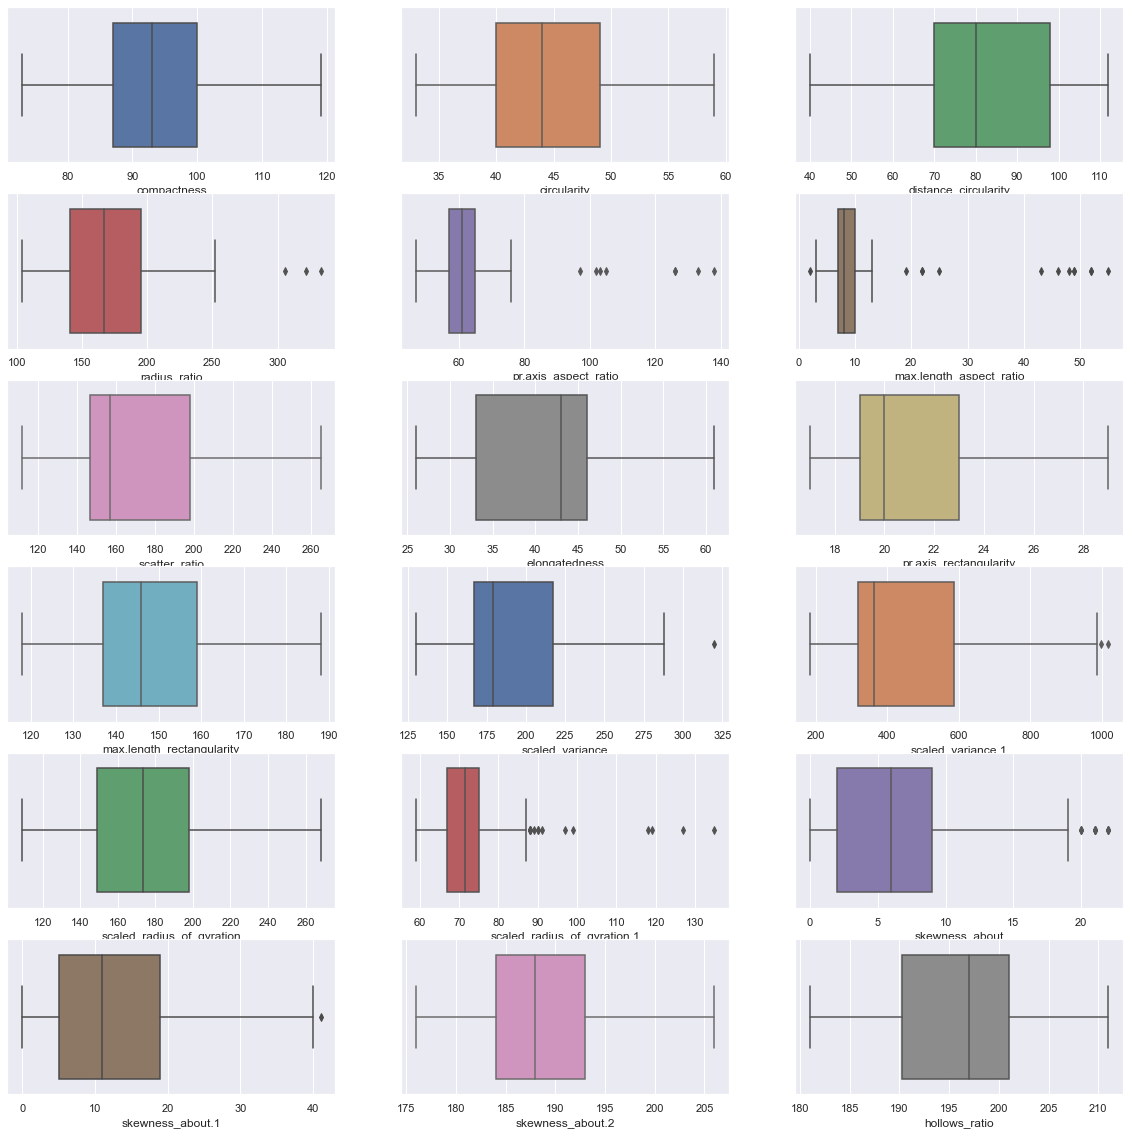

In [69]:
# Visualizing the skeweness more clearly with a vertical mirror image of distribution using the violin plot
fig, axs = plt.subplots(6,3, figsize=(20,20))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
for i in range(18):
    sns.boxplot(automobile_data[automobile_data.columns[i]], color=next(colors)["color"], ax=axs[i]);

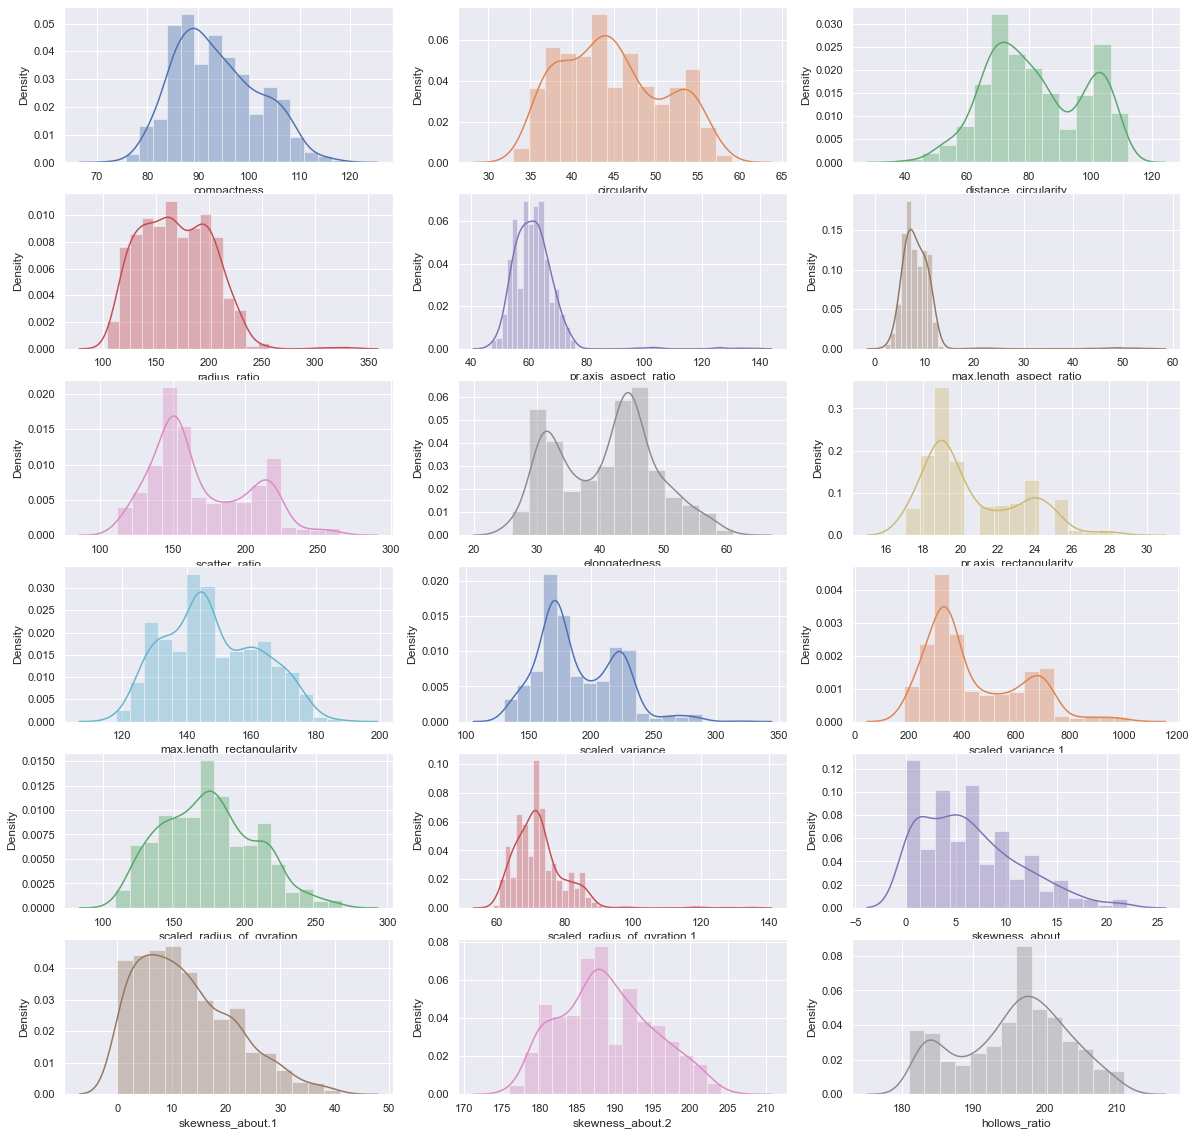

In [70]:
# Visualizing the skeweness more clearly with a vertical mirror image of distribution using the violin plot
fig, axs = plt.subplots(6,3, figsize=(20,20))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
for i in range(18):
    sns.distplot(automobile_data[automobile_data.columns[i]], color=next(colors)["color"], ax=axs[i], kde=True);

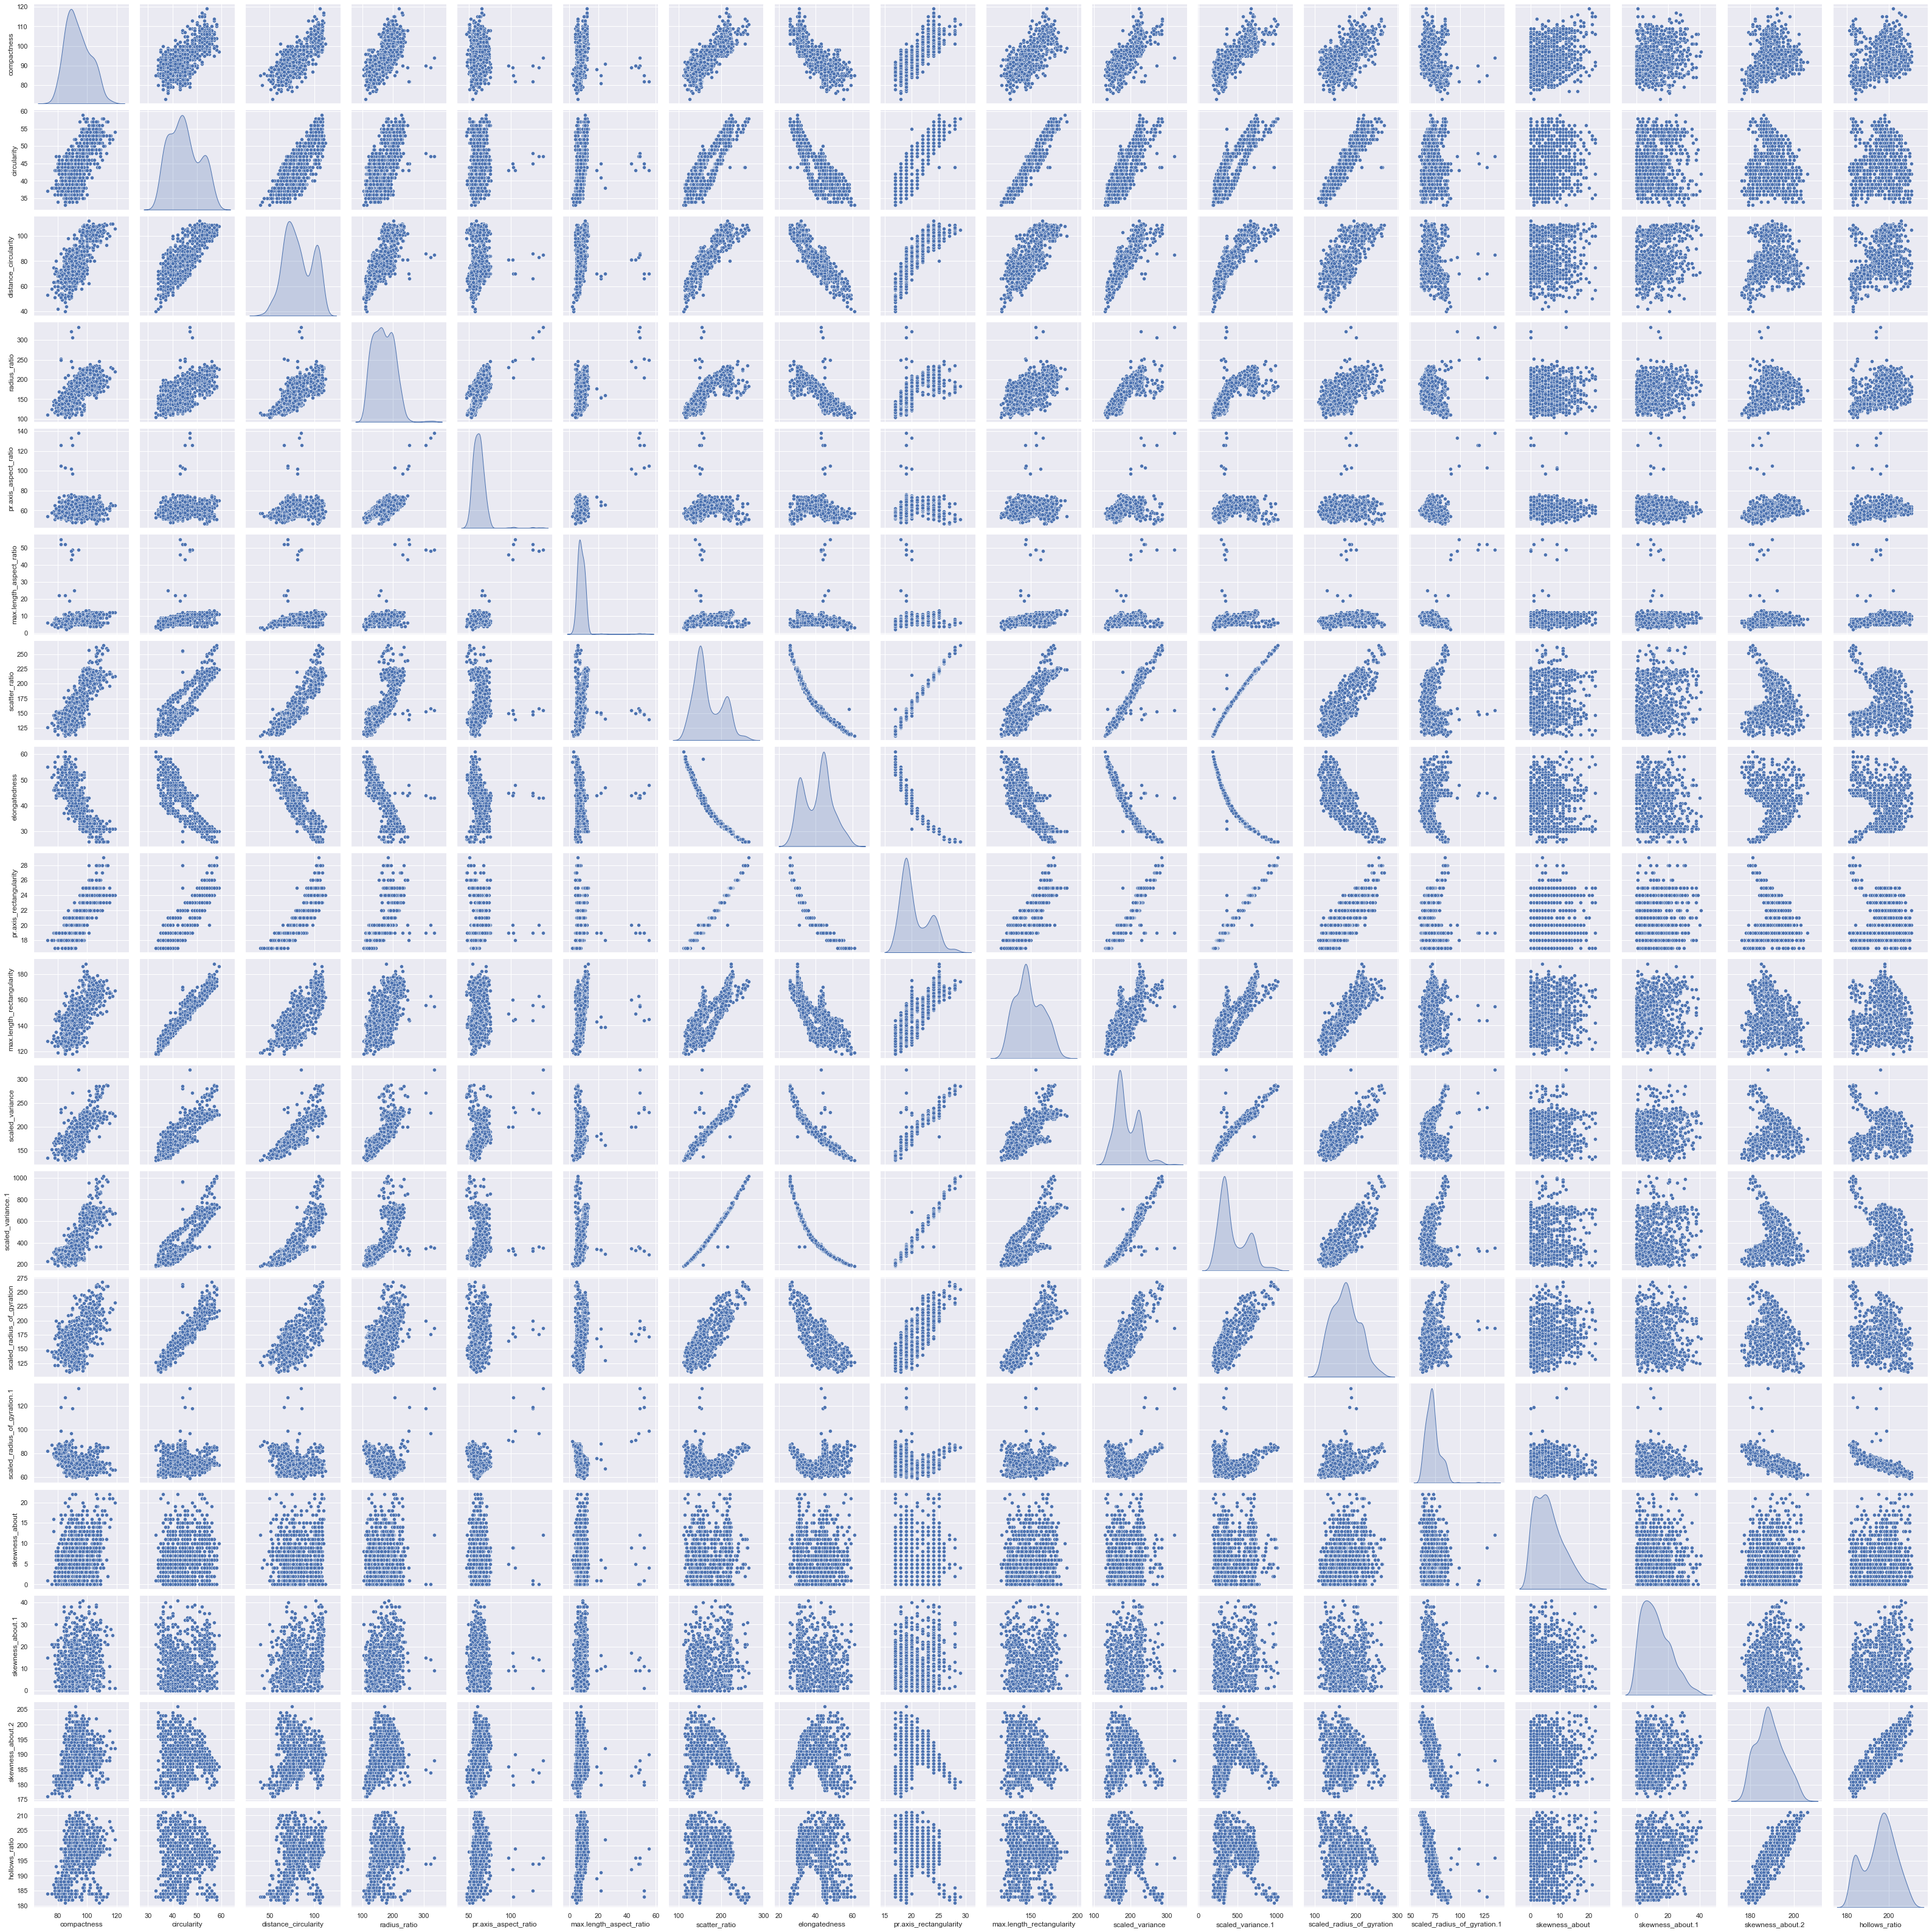

In [71]:
sns.pairplot(automobile_data, diag_kind='kde');

#### Observation: 
<ol>
<li><span style="color:#228B22"> We observe multiple columns are strongly correlated with each other
<li><span style="color:#228B22"> Many distributions have got multiple modes indicating possible gaussian overalap  

In [72]:
automobile_data.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

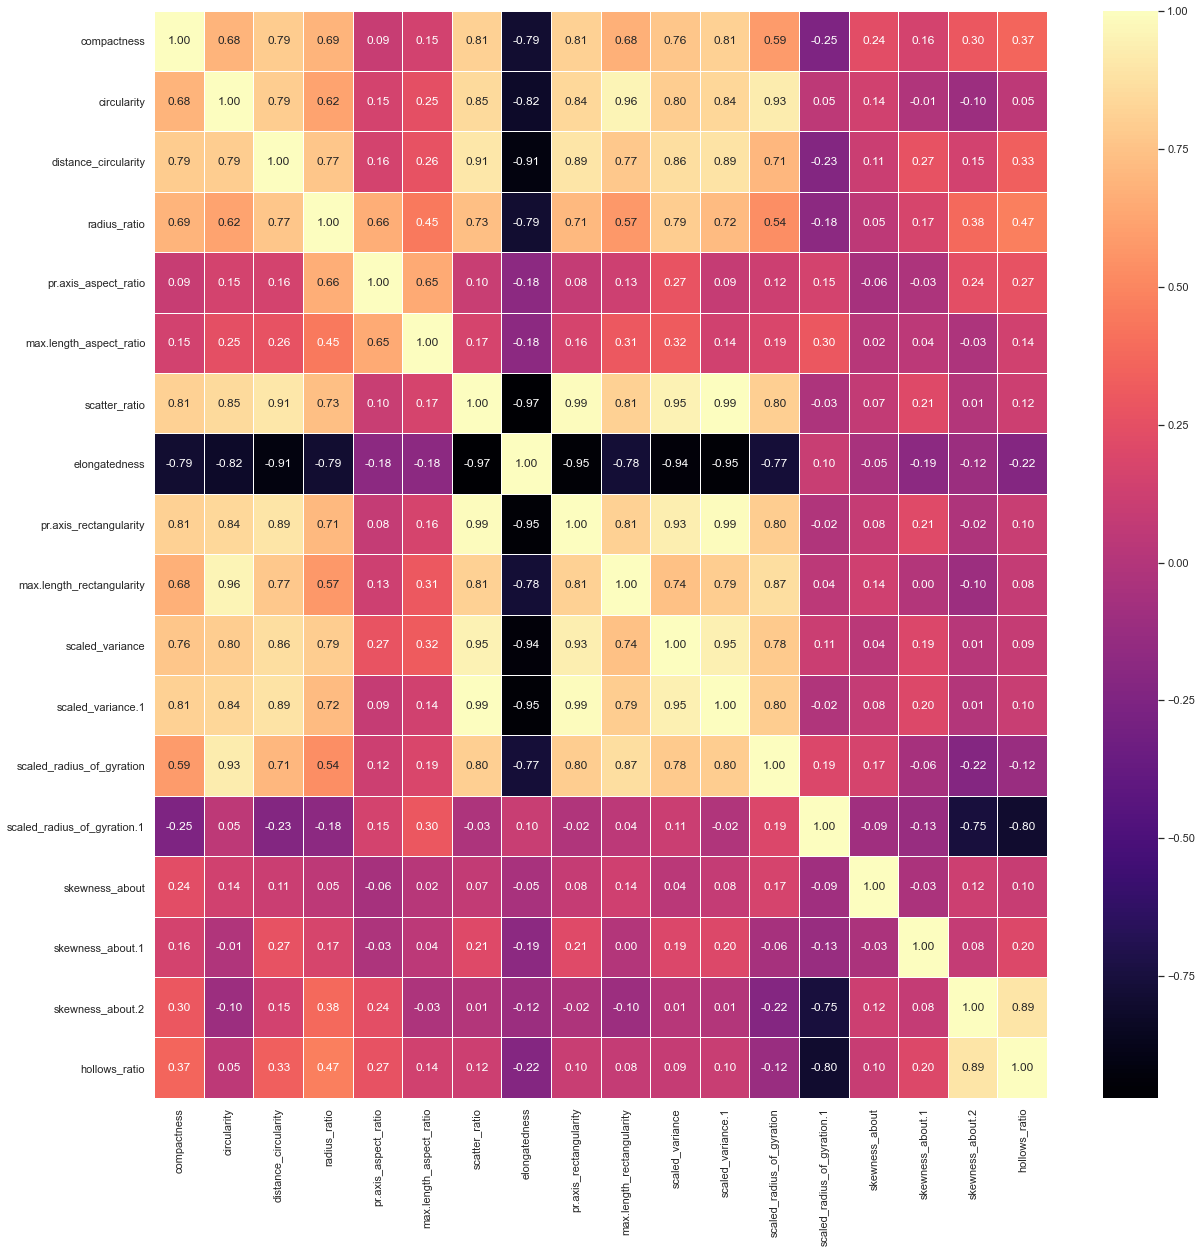

In [73]:
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(automobile_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 3. Classifier: Design and train a best fit SVM classier using all the data attributes

In [74]:
automobile_data_scaled=automobile_data.copy()
automobile_data_scaled.iloc[:,:18]=automobile_data_scaled.iloc[:,:18].apply(zscore)

In [75]:
X = automobile_data_scaled.drop(['class'], axis =1)
Y = automobile_data_scaled['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [76]:
# Fit SVM model on train
clf = SVC(gamma=0.025, C=3)
clf.fit(X_train , Y_train)

Y_pred = clf.predict(X_test)

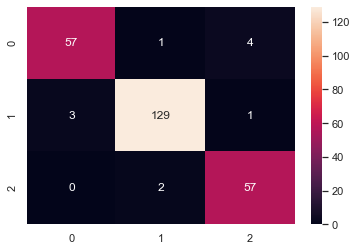

In [78]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test, Y_pred, labels=['van', 'car', 'bus'])
sns.heatmap(cm, annot=True ,fmt='g')

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 4. Dimensional reduction: perform dimensional reduction on the data.

In [79]:
pca = PCA(n_components=18)
pca.fit(automobile_data_scaled.iloc[:,:18])

PCA(n_components=18)

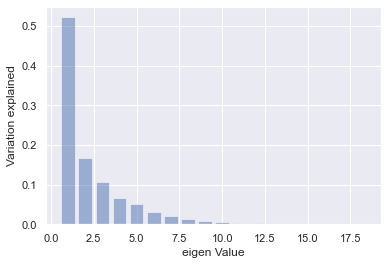

In [80]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

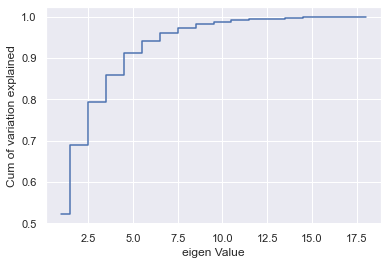

In [81]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [82]:
pca = PCA(n_components=10)
pca.fit(automobile_data_scaled.iloc[:,:18])

PCA(n_components=10)

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes

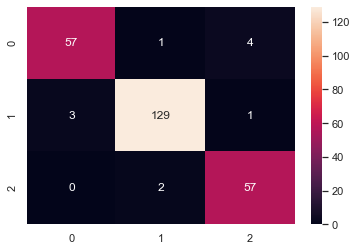

In [83]:
# Fit SVM model on train
clf = SVC(gamma=0.025, C=3)
clf.fit(X_train , Y_train)

Y_pred = clf.predict(X_test)
cm=metrics.confusion_matrix(Y_test, Y_pred, labels=['van', 'car', 'bus'])
sns.heatmap(cm, annot=True ,fmt='g')

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case

#### Ans: 
<ol>
<li><span style="color:#228B22"> We reduced the dimensions to 10, at the same time maintaining the same level of model performance.
<li><span style="color:#228B22"> PCA help reduce the multi collinearity without loosing accuracy

## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> PRAT IV
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* DOMAIN: Sports management 
* CONTEXT: Company X is a sports management company for international cricket. 
* DATA DESCRIPTION: The data is collected belongs to batsman from IPL series conducted so far. * 
* Attribute Information: 
 - 1.Runs: Runs score by the batsman
 - 2.Ave: Average runs scored by the batsman per match
 - 3.SR: strike rate of the batsman
 - 4.Fours: number of boundary/four scored
 - 5.Six: number of boundary/six scored
 - 6.HF: number of half centuries scored so far
* PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.
* Steps and tasks: [ Total Score: 5 points]
 - 1.EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
 - 2.Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [84]:
# Import the dataset named 'Part4 - batting_bowling_ipl_bat.xls'
sports_data  = pd.read_csv('./Part4 - batting_bowling_ipl_bat.xls') 

In [85]:
sports_data.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [86]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.T # return the dataframe
missing_check(sports_data)

HF  Sixes  Fours    SR   Ave  Runs  Name
Total    90.0   90.0   90.0  90.0  90.0  90.0  90.0
Percent   0.5    0.5    0.5   0.5   0.5   0.5   0.5

In [87]:
sports_data.dropna(inplace=True)

In [88]:
sports_data.nunique()

Name     90
Runs     79
Ave      84
SR       88
Fours    41
Sixes    21
HF        7
dtype: int64

In [89]:
sports_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 1. EDA and visualisation

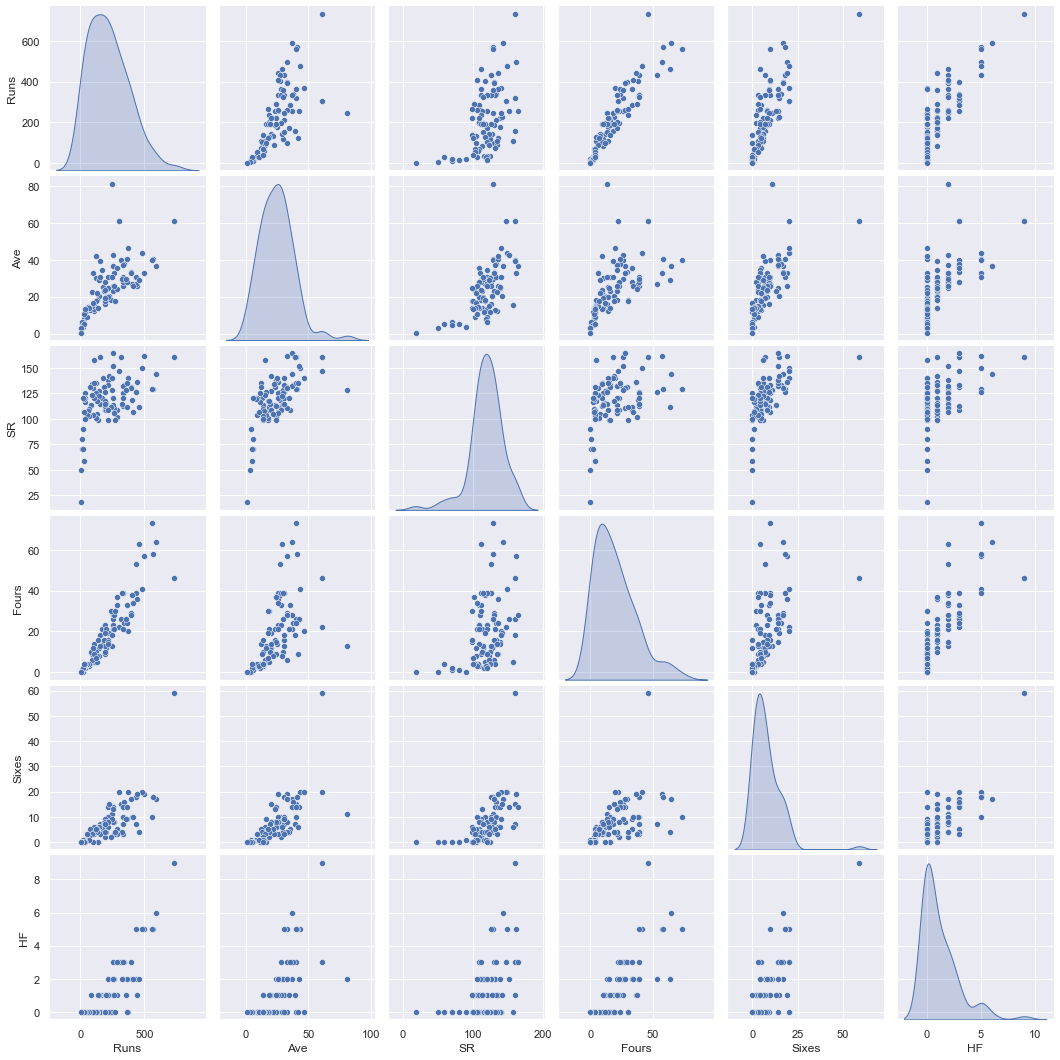

In [90]:
sns.pairplot(sports_data, diag_kind='kde');

In [91]:
#Filtering outliers
sports_data.drop(['Name'], axis=1, inplace=True)
Q1 = sports_data.quantile(0.25)
Q3 = sports_data.quantile(0.75)
IQR = Q3 - Q1
def filter_iqr(data):
    data_filtered = data.copy()

    # Replace every outlier on the lower side by the lower whisker
    for i, j in zip(np.where(data < Q1 - 1.5 * IQR)[0], np.where(data < Q1 - 1.5 * IQR)[1]): 
        whisker  = Q1 - 1.5 * IQR
        data_filtered.iloc[i,j] = whisker[j]

    # Replace every outlier on the upper side by the upper whisker    
    for i, j in zip(np.where(data > Q3 + 1.5 * IQR)[0], np.where(data > Q3 + 1.5 * IQR)[1]):
        whisker  = Q3 + 1.5 * IQR
        data_filtered.iloc[i,j] = whisker[j]
    return data_filtered
sports_data = filter_iqr(sports_data)

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [92]:
sports_data_scaled = sports_data.copy()
sports_data_scaled=sports_data_scaled.apply(zscore)
pca = PCA(n_components=6)
pca.fit(sports_data_scaled)

PCA(n_components=6)

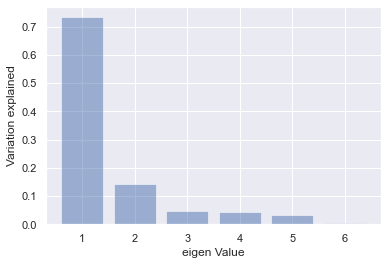

In [93]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [94]:
X = sports_data_scaled
Y = sports_data_scaled.index
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [95]:
# Fit the model on train
model = LinearRegression()
model.fit(X_train, Y_train)
#predict on test
Y_predict = model.predict(X_test)
model_score = model.score(X_test, Y_test)
print(model_score)

0.9477119840465933


In [96]:
pca = PCA(n_components=1)
pca.fit(sports_data_scaled)
X = sports_data_scaled
Y = sports_data_scaled.index
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
model.fit(X_train, Y_train)
#predict on test
Y_predict = model.predict(X_test)
model_score = model.score(X_test, Y_test)
print(model_score)

0.9477119840465933


#### Observation: 
<ol>
<li><span style="color:#228B22"> The model predicts rank with approximately 95 % accuracy and one derived feature 

## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> PRAT V
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* Questions: [ Total Score: 5 points]
 - 1.List down all possible dimensionality reduction techniques that can be implemented using python.
 - 2.So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

#### Ans 1: Possible dimensionality reduction techniques that can be implemented in python are: 
<ol>
<li><span style="color:#228B22">  Principal Component Analysis
<li><span style="color:#228B22">  Singular Value Decomposition
<li><span style="color:#228B22">  Non-Negative Matrix Factorization
<li><span style="color:#228B22">  Linear Discriminant Analysis (LDA)
<li><span style="color:#228B22">  Missing Value Ratio
<li><span style="color:#228B22">  Low Variance Filter
<li><span style="color:#228B22">  High Correlation Filter
<li><span style="color:#228B22">  Random Forest
<li><span style="color:#228B22">  Backward Feature Elimination
<li><span style="color:#228B22">  Forward Feature Selection
<li><span style="color:#228B22">  Factor Analysis
<li><span style="color:#228B22">  Independent Component Analysis
<li><span style="color:#228B22">  Methods Based on Projections
<li><span style="color:#228B22">  t-Distributed Stochastic Neighbor Embedding (t-SNE)
<li><span style="color:#228B22">  UMAP


#### Ans 2: It is possible to do dimensionality reduction on multimedia data and text data with python. A simple implementation to illustrate the same is done below. An image is compressed with PCA algorithm


#### Ans: 
<ol>
<li><span style="color:#228B22"> Yes it is possible to compress images using dimensionality reduction.
<li><span style="color:#228B22"> Here we will demonstrate compression of image with PCA

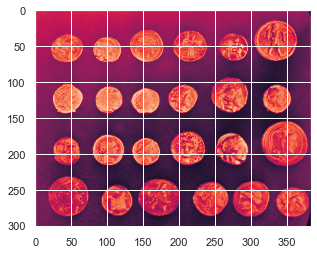

In [97]:
import matplotlib.image as mplib 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from skimage import data

img = data.coins()
plt.imshow(img);

In [98]:
pca = PCA(32).fit(img) 
img_transformed = pca.transform(img) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

(303, 32)
0.9382582421853675


The output image is compressed using PCA

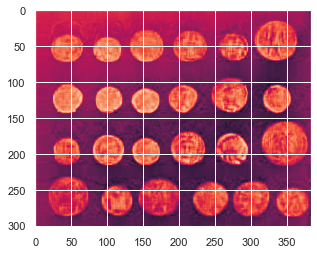

In [99]:
temp = pca.inverse_transform(img_transformed) 
plt.imshow(temp);